# Продажа квартир в Санкт-Петербурге – анализ рынка недвижимости
_____
#### Описание исследования

Исследование заключается в проведении анализа рынка недвижимости в Санкт-Петербурге на основе архивных данных сервиса по продаже и аренде всех видов недвижимости за несколько лет.
_____
#### Цель исследования

Цель исследования заключается в проведении анализа рынка недвижимости в Санкт-Петербурге.
_____
#### Задачи исследования

1. Расчитать цену за квадратный метр;
2. Посчитать день недели, меся и год публикации объявления;
3. Определить этаж квартиры;
4. Изучить соотношение жилой и общей площади, а также отношение площади кухни к общей площади;
5. Изучить параметры квартир (площадь, цену, число комнат, высоту потолка);
6. Выяснить, сколько обычно занимает продажа квартиры;
7. Определить, как цена зависит от удалённости от центра;
8. Провести анализ объявлений квартир в центре Санкт-Петербурга.
_____
#### Исходные данные

Таблица `real_estate_data`:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
* balcony — число балконов;
* ceiling_height — высота потолков (м);
* cityCenters_nearest — расстояние до центра города (м);
* days_exposition — сколько дней было размещено объявление (от публикации до снятия);
* first_day_exposition — дата публикации;
* floor — этаж;
* floors_total — всего этажей в доме;
* is_apartment — апартаменты (булев тип);
* kitchen_area — площадь кухни в квадратных метрах (м²);
* last_price — цена на момент снятия с публикации;
* living_area — жилая площадь в квадратных метрах(м²);
* locality_name — название населённого пункта;
* open_plan — свободная планировка (булев тип);
* parks_around3000 — число парков в радиусе 3 км;
* parks_nearest — расстояние до ближайшего парка (м);
* ponds_around3000 — число водоёмов в радиусе 3 км;
* ponds_nearest — расстояние до ближайшего водоёма (м);
* rooms — число комнат;
* studio — квартира-студия (булев тип);
* total_area — площадь квартиры в квадратных метрах (м²);
* total_images — число фотографий квартиры в объявлении.
______

#### Данное исследование разделим на несколько частей.

##### Часть 1. Импорт бибилиотек, открытие файла, изучение общей информации:
* [1.1 Импорт библиотек, сохранение исходных данных в переменную](#section_1_1)
* [1.2 Изучение общей информации об исходных данных, выявление проблем](#section_1_2)
* [1.3 Предобработка данных](#section_1_3)

##### Часть 2. Анализ данных:
* [2.1 Расчёт показателей, категоризация данных](#section_2_1)
* [2.2 Изучение параметров квартир](#section_2_2)
* [2.3 Время продажи квартир](#section_2_3)
* [2.4 Определение наиболее влияющих факторов на стоимость квартиры](#section_2_4)
* [2.5 Зависимость цены от удаленности от центра](#section_2_5)
* [2.6 Изучение параметров квартир центре Санкт-Петербурга](#section_2_6)

##### Часть 3. Результаты исследования:
* [Результаты исследования](#section_3_1)

##### Часть 4. Общий вывод исследования:
* [Общие выводы](#section_5_1)

## Часть 1. Импорт бибилиотек, открытие файла, изучение общей информации:

<a id='section_1_1'></a>
### 1.1. Импорт библиотек, сохранение исходных данных в переменную

Произведем импорт библиотек и сохраним данные в переменную.

In [1]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<a id='section_1_2'></a>
### 1.2. Изучение общей информации об исходных данных, выявление проблем

Выыедем общую информацию по датасету.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

__В результате открытия файла с данными и изучения общей информации были обнаружены следующие проблемы:__
* пропущенные значения в __15 столбцах__;
* некорректный тип данных опеределенных столбцов.

<a id='section_1_3'></a>
### 1.3. Предобработка данных

Проверим пустые значения в каждом столбце.

In [4]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print(column.describe())

__1. Обработка "total_images"__

In [5]:
investigate_column(data["total_images"])

Null or Na count is 0
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
|Высокое значение стандартного отклонения | Возможно, что сервис позволяет добавлять до 50 изображений на одно объявление, хотя в среднем число изображений на одно изображение равно 10 | Это не ошибка, поэтому изменений не требуется | Столбец не требует изменений, так как не обнаружено пропусков и целочисленный тип данных соответствует смыслу |

__2. Обработка "last_price"__

In [6]:
investigate_column(data["last_price"])

Null or Na count is 0
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Вещественный тип данных | Возможно, произошла ошибка при выгрузке данных разработчиком | Применить метод astype с параметром 'int' |Целочисленный тип данных более логичен по смыслу данных столбца, отражающий цену, а также упрощает восприятие информации |

_Обработаем данные в соответствии с замечаниями_

In [7]:
data['last_price'] = data['last_price'].astype('int')

__3. Обработка "total_area"__

In [8]:
investigate_column(data["total_area"])

Null or Na count is 0
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Высокое значение стандартного отклонения, максимальное значение значительно превышает третий квартиль | Такое значение вполне допустимо, если в базе данных есть частные дома | Не требуется | Столбец не требует измений, так как аномальное значение допустимо, пропусков не обнаружено, вещественный тип данных допустим для описания площади недвижимости |

__4. Обработка "first_day_exposition"__

In [9]:
investigate_column(data["first_day_exposition"])

Null or Na count is 0
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Тип данных object неверен для обозначения даты | Особенности выгрузки данных | Применить метод to_datetime к данному столбцу |Для обозначения даты существует тип данных datetime64, для корректной работы со столбцом необходимо его изменить |

_Обработаем данные в соответствии с замечаниями_

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

__5. Обработка "rooms"__

In [11]:
investigate_column(data["rooms"])

Null or Na count is 0
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Выделяется максимальное число комнат, которое значительно превышает среднее арифметическое и медианное значения | Вполне возможное значение, если речь идет о частном доме | Не требуется |Исходный, изменений не требуется |


#### 6. Обработка "ceiling_height"


In [12]:
investigate_column(data["ceiling_height"])

Null or Na count is 9195
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения, аномальное максимальное значение | Пропущенные значения высоты потолка могли быть специально не заполнены, аномальное максимальное значение вполне вероятно вызвано ошибкой при вводе информации | __1)__ заполнять пустые значения столбца средним арифметическим или медианным значением представляется некорректным; __2)__ удалять строки с этими значениями также не стоит, так как их количество слишком велико и это помешает провести корректный анализ; __3)__ вполне вероятно, что обнаруженное аномальное значение не единственное, поэтому отсортируем таблицу по рассматриваемому столбцу в порядке убывания и выведем первые 15 строк датафрейма; __4)__ в результате п.3 были обнаружены аномальные значения высоты потолка, изучив эти данные можно сделать вывод, что они вызваны неверным размещением точки десятичной дроби при заполнении данных; __5)__ исправим данные, где высота столбца выше 10 метров, поделив их на 10 |Оставляем вещественный тип данных, он корректен для описания высоты |

_Обработаем данные в соответствии с замечаниями_

In [13]:
data.sort_values('ceiling_height', ascending = False).head(15) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000,45.0,2017-07-18,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


Наблюдаются аномальные значения высоты потолка от 25 до 100 метров. Возможно, что была допущена ошибка при заполнении данных – неверно поставлена точка десятичной дроби в числе.

Исправим это, поделив значения столбца больше 10 на 10.

In [14]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
investigate_column(data["ceiling_height"]) #выведем фунцию описания столбца для проверки

Null or Na count is 9195
count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64


In [15]:
median_incomes = data.groupby(['locality_name', 'rooms'])['ceiling_height'].median().to_dict()
    
def ceiling(row):
    if pd.isna(row['ceiling_height']):
        return median_incomes.get((row['locality_name'], row['rooms']))
    return row['ceiling_height']
 
data['ceiling_height'] = data.apply(ceiling, axis=1)

__7. Обработка "floors_total"__

In [16]:
investigate_column(data["floors_total"])

Null or Na count is 86
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Обнаружено 86 пропущенных значений, вещественный тип данных для целочисленного обозначения количества этажей | Пропущенные значения могли быть не заполнены специально, некорректный тип данных может быть вызван ошибкой при выгрузке данных разработчиком | Заполнять пропуски некорректно, так как нет ключевого параметра, позволяющего заполнить эти пропуски без искажения данных, но так как строк с такими пропусками 86 (что равно 0,36% от общего числа данных) то их можно удалить без сильного искажения данных, для изменения типа данных применить метод astype с параметром 'int' |Целочисленный тип данных подходит по смыслу для описания этажности здания |

_Обработаем данные в соответствии с замечаниями_

In [17]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')
investigate_column(data["floors_total"])

Null or Na count is 0
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


__8. Обработка "living_area"__

In [18]:
investigate_column(data["living_area"])

Null or Na count is 1870
count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения | При подаче объявления могла быть не указана | По числу комнат и населенному пункту определить медианное значение по каждой категории |Вещественный, так как подходит к описанию площади помещения |

_Обработаем данные в соответствии с замечаниями_

In [19]:
median_incomes = data.groupby(['locality_name', 'rooms'])['living_area'].median().to_dict()

def l_area(row):
    if pd.isna(row['living_area']):
        return median_incomes.get((row['locality_name'], row['rooms']))
    return row['living_area']
 
data['living_area'] = data.apply(l_area, axis=1)


__9. Обработка "floor"__

In [20]:
investigate_column(data["floor"])

Null or Na count is 0
count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Высокое стандартное отклонение | Вполне допустимо | Не требуется |Целочисленный, логичен для описания этажа |

__10. Обработка "is_apartment"__

In [21]:
investigate_column(data["is_apartment"])

Null or Na count is 20838
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


_Обработаем данные в соответствии с замечаниями_

| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Некорректный тип данных, пропущенные значения | Ошибки при вводе информации в столбец | Поменять тип данных на bool методом astype |Логический тип данных bool, т.к. наиболее подходит для определения наличия признака|

In [22]:
data['is_apartment'] = data['is_apartment'].astype('bool')

__11. Обработка "studio"__

In [23]:
investigate_column(data["studio"])

Null or Na count is 0
count     23613
unique        2
top       False
freq      23467
Name: studio, dtype: object


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
|Не обнаружено | _ | Не требуется |Без изменений, нет аномалий |

__12. Обработка "open_plan"__

In [24]:
investigate_column(data["open_plan"])

Null or Na count is 0
count     23613
unique        2
top       False
freq      23546
Name: open_plan, dtype: object


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
|Не обнаружено | _ | Не требуется |Без изменений, нет аномалий |

__13. Обработка "kitchen_area"__

In [25]:
investigate_column(data["kitchen_area"])

Null or Na count is 2231
count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
|Пропущенные значения | Вероятно, что не были указаны в объявлении | По числу комнат и населенному пункту определить медианное значение по каждой категории |Вещественный, так как наиболее подходит для описание площади недвижимости |

_Обработаем данные в соответствии с замечаниями_

In [26]:
median_incomes = data.groupby(['locality_name', 'rooms'])['kitchen_area'].median().to_dict()

def k_area(row):
    if pd.isna(row['kitchen_area']):
        return median_incomes.get((row['locality_name'], row['rooms']))
    return row['kitchen_area']
 
data['kitchen_area'] = data.apply(k_area, axis=1)

__14. Обработка "balcony"__

In [27]:
investigate_column(data["balcony"])

Null or Na count is 11480
count    12133.000000
mean         1.154208
std          1.071022
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


_Обработаем данные в соответствии с замечаниями_

| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
|Пропущенные значения, вещественный тип данных | Возможно, что не были заполнены данные, ввиду отсутствия балкона в объекте недвижимости | Заменить пустые значения на 0 |Целочисленный, так как логичен по смыслу данных (число балконов) |

In [28]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

__15. Обработка "locality_name"__

In [29]:
investigate_column(data["locality_name"])

Null or Na count is 48
count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения | Ошибки при заполнении базы данных | Ввиду того, что число обнаруженных уникальных значений невелико, установить населенный пункт не представляется возможным и их количество незначительно, поэтому удаление таких данных не сильно исказит результат |Строковый для описания названия населенного пункта |

_Обработаем данные в соответствии с замечаниями_

In [30]:
data.dropna(subset=['locality_name'], inplace=True)
investigate_column(data["locality_name"])

Null or Na count is 0
count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object


__16. Обработка "airports_nearest"__

In [31]:
investigate_column(data["airports_nearest"])

Null or Na count is 5524
count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить медианным расстоянием от аэропорта до населенного пункта, где находится объект |Целочисленный, так как наиболее подходит для расстояния в метрах между объектом и аэропортом в масштабе агломерации |

_Обработаем данные в соответствии с замечаниями_

___Сохраним срез nan_airports_nearest, где значения в столбце 'airports_nearest' пустые, и изучим его.___

In [32]:
nan_airports_nearest = data[data['airports_nearest'].isna()]
nan_airports_nearest.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,True,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,2.56,9,18.00,2,True,...,8.50,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,28.00,1,True,...,6.00,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,True,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000,56.10,2018-10-18,3,2.55,4,42.50,3,True,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000,35.00,2018-01-01,1,2.70,12,16.00,8,True,...,10.00,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.80,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


__Обратим внимание,__ что пустые значения характерны не только для столбца airports_nearest, но и для cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. Также стоит обратить внимание, что такие пустые значения характерны для населенных пунктов Ленинградской области.

Проверим уникальные значения среза.

In [33]:
nan_airports_nearest['locality_name'].value_counts()

посёлок Мурино          520
Всеволожск              398
Гатчина                 307
деревня Кудрово         299
Выборг                  237
                       ... 
деревня Щеглово           1
посёлок Алексеевка        1
деревня Пельгора          1
поселок Каложицы          1
посёлок Дзержинского      1
Name: locality_name, Length: 344, dtype: int64

Выведенная информация не дает однозначного ответа на принадлежность населенных пунктов с пустыми значениями в столбце airports_nearest к Ленинградской области.

Поэтому предположим, что данные в столбце airports_nearest присутствуют для объявлений из Санкт-Петербурга. Проверим эту гипотезу.

In [34]:
airports_nearest = data.query('airports_nearest >= 0')
airports_nearest['locality_name'].value_counts()

Санкт-Петербург            15567
посёлок Шушары               436
Пушкин                       369
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Петро-Славянка         1
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Белоостров             1
Name: locality_name, dtype: int64

Уникальные значения населенных пунктов, где указано расстояние для ближайшего аэропорта, могут ввести в заблуждение, так как помимо Санкт-Петербурга указаны другие так называемые населенные пункты. Но все указанные уникальные значения относятся к муниципальным округам административных районов Санкт-Петербурга, иначе говоря гипотеза подтвердилась, значения столбца airports_nearest заполнены для объявлений из Санкт-Петербурга.

__В результате определены все причины появления пропущенных значений, что позволит нам корректно их заполнить:__

1) Заполним пустые значения медианным расстоянием от аэропорта до населенного пункта, где находится объект;

2) Оставшиеся пустые значения заменим на -1.

In [35]:
median_dist_to_airport = data.groupby('locality_name')['airports_nearest'].median().to_dict()

def airport_dist(row):
    if pd.isna(row['airports_nearest']):
        return median_dist_to_airport[row['locality_name']]
    return row['airports_nearest']
 
data['airports_nearest'] = data.apply(airport_dist, axis=1)

Проверим сколько пустых значений удалось заполнить таким способом.

In [36]:
investigate_column(data["airports_nearest"])

Null or Na count is 5432
count    18133.000000
mean     28788.533971
std      12606.251799
min          0.000000
25%      18590.000000
50%      26763.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64


В результате таким способом 92 значения были заполнены, незначительно, но это позволит нам сохранить потенциально важные данные и провести более грамотный анализ для Санкт-Петербурга.

Заполним пустые значения столбца для объявлений из Ленинградской области, заменим тип данных столбца на целочисленный и выведем общую информацию по столбцу для проверки.

In [37]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['airports_nearest'] = data['airports_nearest'].astype('int')
investigate_column(data["airports_nearest"])

Null or Na count is 0
count    23565.000000
mean     22152.219520
std      16410.535947
min         -1.000000
25%      10492.000000
50%      21934.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64


__17. Обработка "cityCenters_nearest"__

In [38]:
investigate_column(data["cityCenters_nearest"])

Null or Na count is 5501
count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить медианным расстоянием от центра города до населенного пункта, где находится объект |Целочисленный, так как наиболее подходит для описания расстояния между объектом и центром города в метрах |

_Обработаем данные в соответствии с замечаниями_

Поступим по аналогии с предыдущим стобцом airports_nearest. Поэтому предположим, что данные в столбце cityCenters_nearest присутствуют для объявлений из Санкт-Петербурга. Проверим эту гипотезу.

In [39]:
cityCenters_nearest = data.query('cityCenters_nearest >= 0')
cityCenters_nearest['locality_name'].value_counts()

Санкт-Петербург            15591
посёлок Шушары               436
Пушкин                       368
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Петро-Славянка         1
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Белоостров             1
Name: locality_name, dtype: int64

Гипотеза подтвердилась, значения столбца cityCenters_nearest заполнены для объявлений из Санкт-Петербурга.

__В результате определены все причины появления пропущенных значений, что позволит нам корректно их заполнить:__

1) Заполним пустые значения медианным расстоянием от центра города до населенного пункта, где находится объект;

2) Оставшиеся пустые значения заменим на -1.

In [40]:
median_dist_to_centre = data.groupby('locality_name')['cityCenters_nearest'].median().to_dict()

def cityCenters_dist(row):
    if pd.isna(row['cityCenters_nearest']):
        return median_dist_to_centre[row['locality_name']]
    return row['cityCenters_nearest']
 
data['cityCenters_nearest'] = data.apply(cityCenters_dist, axis=1)

In [41]:
investigate_column(data["cityCenters_nearest"])

Null or Na count is 5432
count    18133.000000
mean     14195.267882
std       8610.213514
min        181.000000
25%       9265.000000
50%      13073.000000
75%      16275.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


Заполнено 69 пропущенных значений. Заполним пустые значения столбца для объявлений из Ленинградской области, заменим тип данных столбца на целочисленный и выведем общую информацию по столбцу для проверки.

In [42]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
investigate_column(data["cityCenters_nearest"])

Null or Na count is 0
count    23565.000000
mean     10922.866921
std       9633.000587
min         -1.000000
25%       2371.000000
50%      11299.000000
75%      15247.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


__18. Обработка "parks_around3000"__

In [43]:
investigate_column(data["parks_around3000"])

Null or Na count is 5500
count    18065.000000
mean         0.611569
std          0.802088
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения, вещественный тип данных | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить медианным числом парков в радиусе 3 км для населенного пункта, где расположен объект |Целочисленный, необходим для определения количества парков в радиусе 3 км |

_Обработаем данные в соответствии с замечаниями_

In [44]:
median_parks_number = data.groupby('locality_name')['parks_around3000'].median().to_dict()

def parks_num(row):
    if pd.isna(row['parks_around3000']):
        return median_parks_number[row['locality_name']]
    return row['parks_around3000']
 
data['parks_around3000'] = data.apply(parks_num, axis=1)

In [45]:
investigate_column(data["parks_around3000"])

Null or Na count is 5432
count    18133.000000
mean         0.609386
std          0.801508
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


In [46]:
data[data['parks_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,-1,-1,NaN,NaN,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,8.81,0,посёлок Мурино,-1,-1,NaN,NaN,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,True,...,9.00,0,Сертолово,-1,-1,NaN,NaN,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,-1,-1,NaN,NaN,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,2.56,9,18.00,2,True,...,8.50,0,Коммунар,-1,-1,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,62.80,2018-09-18,4,2.50,5,45.50,3,True,...,5.50,0,посёлок Дзержинского,-1,-1,NaN,NaN,NaN,NaN,NaN
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,True,...,6.00,0,Тихвин,-1,-1,NaN,NaN,NaN,NaN,413.0
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,True,...,8.50,0,Тосно,-1,-1,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,8.30,0,село Рождествено,-1,-1,NaN,NaN,NaN,NaN,NaN


Заметна та же тенденция, что и со столбцами `airports_nearest` и `cityCenters_nearest`. Проверим гипотезу о том, что не указаны данные по населенным пунктам Ленинградской области.

In [47]:
parks_around3000 = data.query('parks_around3000 >= 0')
parks_around3000['locality_name'].value_counts()

Санкт-Петербург            15651
посёлок Шушары               439
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    133
Кронштадт                     96
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Петро-Славянка         1
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Белоостров             1
Name: locality_name, dtype: int64

Гипотеза подтвердилась. Заменим пропущенные значения на -1 и заменим тип данных на целочисленный.

In [48]:
data['parks_around3000'] = data['parks_around3000'].fillna(-1)
data['parks_around3000'] = data['parks_around3000'].astype('int')
investigate_column(data["parks_around3000"])

Null or Na count is 0
count    23565.000000
mean         0.238404
std          0.976612
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


__19. Обработка "parks_nearest"__

In [49]:
investigate_column(data["parks_nearest"])

Null or Na count is 15535
count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения, вещественный тип данных | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить пустые значения медианным расстоянием до ближайшего парка для каждого населенного пункта |Вещественный, так как наиболее точно показывает расстояние между объектом и ближайшим парком в масштабе агломерации |

_Обработаем данные в соответствии с замечаниями_

Поступим по аналогии с предыдущими стобцами. Поэтому предположим, что данные в столбце `cityCenters_nearest` присутствуют для объявлений из Санкт-Петербурга. Проверим эту гипотезу.

In [50]:
parks_nearest = data.query('parks_nearest >= 0')
parks_nearest['locality_name'].value_counts()

Санкт-Петербург      7251
Пушкин                212
Петергоф              143
Колпино               133
Кронштадт              87
Сестрорецк             72
Красное Село           45
Павловск               26
посёлок Стрельна       19
Зеленогорск            16
Ломоносов              16
посёлок Парголово      10
Name: locality_name, dtype: int64

Гипотеза подтвердилась, значения столбца parks_nearest заполнены для объявлений из Санкт-Петербурга.

__В результате определены все причины появления пропущенных значений, что позволит нам корректно их заполнить:__

1) Заполним пустые значения медианным расстоянием от центра города до населенного пункта, где находится объект;

2) Оставшиеся пустые значения заменим на -1.

In [51]:
median_dist_to_park = data.groupby('locality_name')['parks_nearest'].median().to_dict()

def parks_dist(row):
    if pd.isna(row['parks_nearest']):
        return median_dist_to_park[row['locality_name']]
    return row['parks_nearest']
 
data['parks_nearest'] = data.apply(parks_dist, axis=1)
investigate_column(data["parks_nearest"])

Null or Na count is 5986
count    17579.000000
mean       475.895244
std        234.981831
min          1.000000
25%        433.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


Заменим пропущенные значения на -1 и заменим тип данных на целочисленный.

In [52]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].astype('int')

__20. Обработка "ponds_around3000"__

In [53]:
investigate_column(data["ponds_around3000"])

Null or Na count is 5500
count    18065.000000
mean         0.769499
std          0.938669
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения, вещественный тип данных | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить медианным числом водоемов в радиусе 3 км для населенного пункта, где расположен объект |Целочисленный, необходим для определения количества водоемов в радиусе 3 км |

_Обработаем данные в соответствии с замечаниями_

In [54]:
median_ponds_number = data.groupby('locality_name')['ponds_around3000'].median().to_dict()

def ponds_num(row):
    if pd.isna(row['ponds_around3000']):
        return median_ponds_number[row['locality_name']]
    return row['ponds_around3000']
 
data['ponds_around3000'] = data.apply(ponds_num, axis=1)
investigate_column(data["ponds_around3000"])

Null or Na count is 5432
count    18133.000000
mean         0.770143
std          0.937136
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


Пустые значения остались, проверим причину их появления, изучив срез данных по пустым значениям рассматриваемого столбца.

In [55]:
data[data['ponds_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,-1,-1,-1,-1,NaN,NaN,55.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,8.81,0,посёлок Мурино,-1,-1,-1,-1,NaN,NaN,189.0
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,True,...,9.00,0,Сертолово,-1,-1,-1,-1,NaN,NaN,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,True,...,11.00,2,деревня Кудрово,-1,-1,-1,-1,NaN,NaN,60.0
30,12,2200000,32.80,2018-02-19,1,2.56,9,18.00,2,True,...,8.50,0,Коммунар,-1,-1,-1,-1,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,62.80,2018-09-18,4,2.50,5,45.50,3,True,...,5.50,0,посёлок Дзержинского,-1,-1,-1,-1,NaN,NaN,NaN
23692,2,1350000,30.00,2017-07-07,1,2.65,5,17.50,4,True,...,6.00,0,Тихвин,-1,-1,-1,-1,NaN,NaN,413.0
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,True,...,8.50,0,Тосно,-1,-1,-1,-1,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,8.30,0,село Рождествено,-1,-1,-1,-1,NaN,NaN,NaN


Заметна та же тенденция, что и со столбцом `parks_around3000`. Проверим гипотезу о том, что не указаны данные по населенным пунктам Ленинградской области.

In [56]:
ponds_around3000 = data.query('ponds_around3000 >= 0')
ponds_around3000['locality_name'].value_counts()

Санкт-Петербург            15651
посёлок Шушары               439
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    133
Кронштадт                     96
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Петро-Славянка         1
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Белоостров             1
Name: locality_name, dtype: int64

Гипотеза подтвердилась. Заменим пропущенные значения на -1 и заменим тип данных на целочисленный.

In [57]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(-1)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
investigate_column(data["ponds_around3000"])

Null or Na count is 0
count    23565.000000
mean         0.362105
std          1.109770
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


__21. Обработка "ponds_nearest"__

In [58]:
investigate_column(data["ponds_nearest"])

Null or Na count is 14529
count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения | Ошибки при автоматическом определении расстояния на основе картографических данных | Заполнить пустые значения медианным расстоянием до ближайшего водоема для каждого населенного пункта |Вещественный, так как наиболее точно показывает расстояние между объектом и ближайшим водоемом в масштабе агломерации |

_Обработаем данные в соответствии с замечаниями_

Поступим по аналогии с предыдущими стобцами. Поэтому предположим, что данные в столбце `cityCenters_nearest` присутствуют для объявлений из Санкт-Петербурга. Проверим эту гипотезу.

In [59]:
ponds_nearest = data.query('ponds_nearest >= 0')
ponds_nearest['locality_name'].value_counts()

Санкт-Петербург            7936
Колпино                     190
Пушкин                      177
посёлок Шушары              152
Сестрорецк                  135
Петергоф                    117
Кронштадт                    87
Ломоносов                    83
посёлок Парголово            56
Павловск                     34
посёлок Стрельна             24
Зеленогорск                  18
Красное Село                 10
посёлок Понтонный             7
посёлок Сапёрный              6
посёлок Александровская       2
посёлок Петро-Славянка        1
посёлок Белоостров            1
Name: locality_name, dtype: int64

Гипотеза подтвердилась, значения столбца ponds_nearest заполнены для объявлений из Санкт-Петербурга.

__В результате определены все причины появления пропущенных значений, что позволит нам корректно их заполнить:__

1) Заполним пустые значения медианным расстоянием от центра города до населенного пункта, где находится объект;

2) Оставшиеся пустые значения заменим на -1.

In [60]:
median_dist_to_pond = data.groupby('locality_name')['ponds_nearest'].median().to_dict()

def ponds_dist(row):
    if pd.isna(row['ponds_nearest']):
        return median_dist_to_pond[row['locality_name']]
    return row['ponds_nearest']
 
data['ponds_nearest'] = data.apply(ponds_dist, axis=1)
investigate_column(data["ponds_nearest"])

Null or Na count is 5517
count    18048.000000
mean       510.622257
std        199.869658
min         13.000000
25%        466.000000
50%        504.000000
75%        563.000000
max       1344.000000
Name: ponds_nearest, dtype: float64


Заменим пропущенные значения на -1 и заменим тип данных на целочисленный.

In [61]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

__22. Обработка "days_exposition"__

In [62]:
investigate_column(data["days_exposition"])

Null or Na count is 3171
count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


| Обнаруженные аномалии | Причины, по которым они могли возникнуть| Как исправлять | Финальный тип и почему |
| :-------------------- | :--------------------- |:---------------------------- |:----------------------------|
| Пропущенные значения, вещественный тип данных | Пропущенные значения могли возникнуть по причине того, что объявления на момент разработки базы данных не были сняты, возможно создатели объявлений могли забыть это сделать (в будущем можно запросить разработчика добавить в таблицу индикатор снятия объявления с продажи) | Предположим, что имеем дело с первым случаем и заменим пропуски на -1 |Целочисленный тип данных наиболее логичен по смыслу описываемых в столбце данных |

_Обработаем данные в соответствии с замечаниями_

In [63]:
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'] = data['days_exposition'].astype('int')

__Обработка дубликатов__

Применим методы duplicated и sum для определения количества дубликатов в датасете.

In [64]:
print ('Количество дубликатов в датафрейме:', data.duplicated().sum())

Количество дубликатов в датафрейме: 0


Дубликатов не обнаружено.

__Вывод по этапу предобработки данных__

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23294 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23510 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23322 non-null  float64       
 13  balcony         

В 14 столбцах обнаружены пропуски и их число отличается, поэтому можно утверждать, что причины их появлений различны. В некоторых столбцах число пропусков насчитывает более 5 тысяч. Также были отмечены некорректные типы данных.

По результатам выполненной работы по предобработке данных были выполнены следующие действия:
 - изучен каждый столбец на предмет аномалий (пропущенные значения, некорректный тип данных, аномальные значения);
 - произведена замена типа данных на целочисленный в столбцах last_price, floors_total, balcony, days_exposition, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest;
 - произведена замена типа данных на datatime столбца first_day_exposition;
 - произведена замена типа данных на bool столбца is_apartment;
 - установили причины появления пустых значений и исходя их этого заполнили их в столбцах ceiling_height, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;
 - удалили строки с пустыми значениями в столбцах floors_total и locality_name, ввиду их небольшого количества;
 - установили причины появления аномальных значений и произвели их корректировку в столбцах ceiling_height.



## Часть 2. Анализ данных

<a id='section_2_1'></a>
### 2.1 Расчёт показателей, категоризация данных

_Расчет цены за квадратный метр_

In [66]:
data['price_per_sq_meter'] = data['last_price'] / data['total_area']
data['price_per_sq_meter'] = data['price_per_sq_meter'].astype('int')

_Определение дня недели, месяца и года публикации_

In [67]:
data['first_exposition_day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek 
data['first_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['first_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

_Категоризация по этажам_

In [68]:
def floor_category(row):

    floor = row['floor']
    total_floor = row['floors_total']

    if floor == 1:
        return 'первый'

    if floor == total_floor:
        return 'последний'

    return 'другой' 

data['floor_group'] = data.apply(floor_category, axis=1) 

_Расчет соотношения жилой и общей площади и соотношения площади кухни к общей_

In [69]:
data['living_total_ratio'] = data['living_area'] / data ['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data ['total_area']

_Расчет расстояния до центра в километрах_

In [70]:
data ['center_distance_km'] = data['cityCenters_nearest'] / 1000
data ['center_distance_km'] = data ['center_distance_km'].astype('int')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_sq_meter,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_group,living_total_ratio,kitchen_total_ratio,center_distance_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,755,-1,120370,3,3,2019,другой,0.472222,0.231481,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,584,81,82920,1,12,2018,первый,0.460396,0.272277,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,574,558,92785,3,8,2015,другой,0.612500,0.148214,13
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.70,9,True,...,234,424,408176,4,7,2015,другой,0.287421,0.062893,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48,121,100000,1,6,2018,другой,0.320000,0.410000,8
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,True,...,-1,55,95065,0,9,2018,другой,0.473684,0.299342,0
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,True,...,593,155,99195,3,11,2017,другой,0.284182,0.386059,19
7,5,7915000,71.60,2019-04-18,2,2.65,24,31.00,22,True,...,504,-1,110544,3,4,2019,другой,0.432961,0.263966,11
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,-1,189,87454,2,5,2018,другой,0.465320,0.265682,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,504,289,88524,6,2,2017,другой,0.714754,0.106557,15


__Определим период исследования__

In [71]:
print ('Дата размещения первого объявления :',data['first_day_exposition'].min()) 

Дата размещения первого объявления : 2014-11-27 00:00:00


In [72]:
print ('Дата размещения последнего объявления :',data['first_day_exposition'].max())

Дата размещения последнего объявления : 2019-05-03 00:00:00


__Наблюдения проходили с 27 ноября 2014 г. по 3 мая 2019 г.__

### 2.2 Изучение параметров квартир

__Общая площадь__

In [73]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму по столбцу total_area.

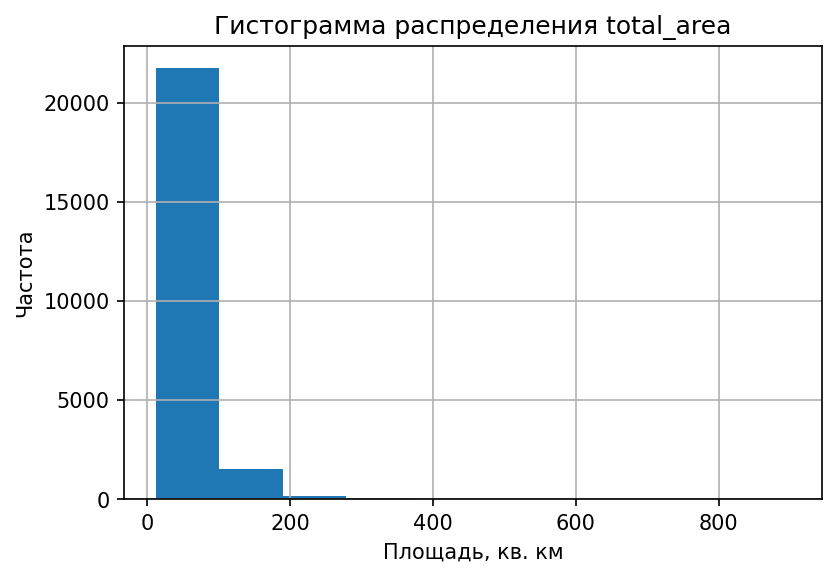

In [74]:
data.hist('total_area')
plt.xlabel('Площадь, кв. км')
plt.ylabel('Частота')
plt.title('Гистограмма распределения total_area')
plt.grid(True)
plt.show()

__Комментарии:__ 

* Данная гистограмма говорит о том, что наибольшее число объявлений (более 2000) о продаже квартир имеет общую площадь до 100 кв. метров;
* Для наиболее наглядного представления распределения объявлений о продаже квартир установим границы от 0 до 100.

In [75]:
def plot_parametrs (df, column, x1, x2, n_bins, xlabel):
    df.plot (kind='hist', y=column, range=(x1,x2), label=column, title = "Гистограмма распределения " + str(column), bins=n_bins, grid=True, legend=True)
    plt.xlabel (xlabel)
    plt.ylabel ('Частота')

def boxplot_parametrs (df, column, y1, y2, ylabel):
    plt.ylim(y1,y2)
    df.boxplot(column)
    plt.title ('Диаграмма размаха '+ str(column))
    plt.ylabel (ylabel)

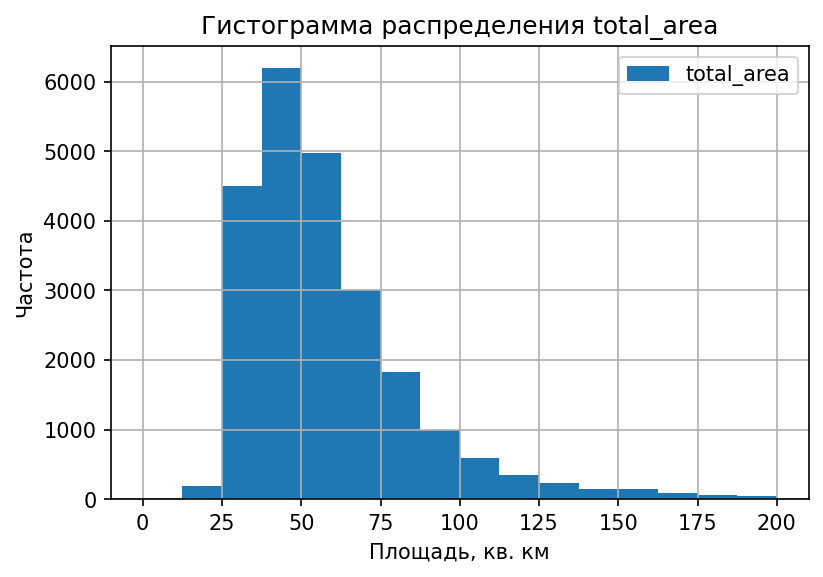

In [76]:
plot_parametrs (data, 'total_area', 0, 200, 16, 'Площадь, кв. км')

Изучим диаграмму размаха значений общей площади квартиры.

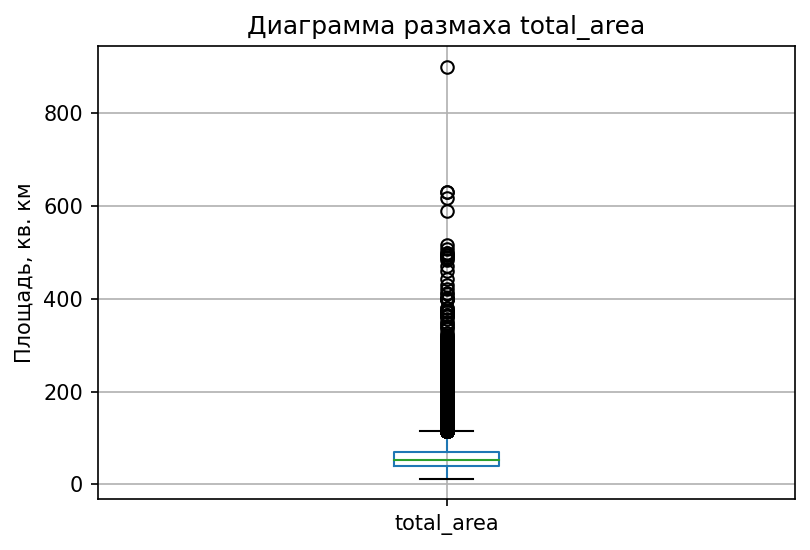

In [77]:
data.boxplot('total_area')
plt.ylabel('Площадь, кв. км')
plt.title('Диаграмма размаха total_area')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 900 кв. метров;
* для наглядного представления диаграммы размаха для общей площади нарисуем её с ограничениями по оси ординат (0 и 200).

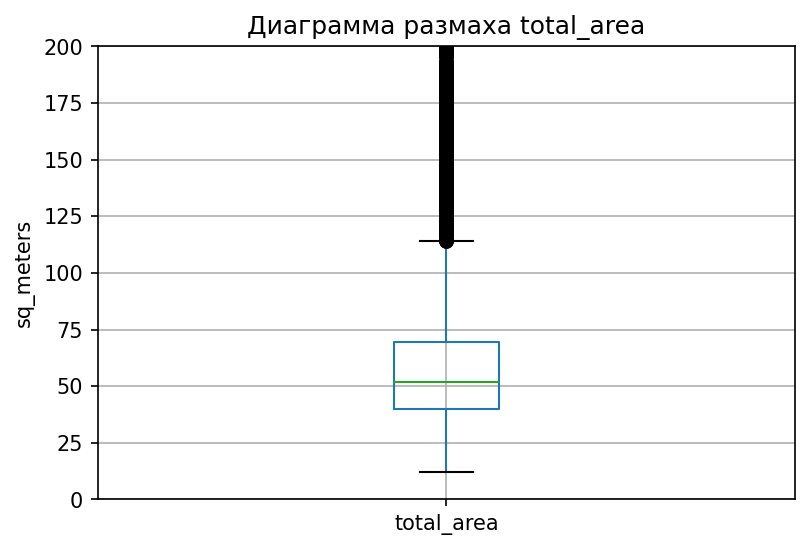

In [78]:
boxplot_parametrs (data, 'total_area', 0, 200, 'sq_meters')

__Выводы:__
- медианное и среднее арифметическое значения этого поля незначительно отличаются;
- значения столбца отличаются от среднего на 35,7;
- по данным гистограммы можно сказать, что наибольшее число объявлений характерно для квартир общей площадью от 40 до 50 кв. м. (более 5000), от 30 до 40 кв. м. (примерно 5000) и от 50 до 60 кв. м. (чуть менее 4000);
- диаграмма размаха позволяет сказать, большая часть значений лежит в диапазоне от 40 до 70 кв. метров, а также то, что поле содержит выбросы до 900 кв. метров.

__Жилая площадь__

In [79]:
data['living_area'].describe()

count    23510.000000
mean        34.317647
std         21.724115
min          2.000000
25%         18.400000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

Построим гистограмму по столбцу living_area.

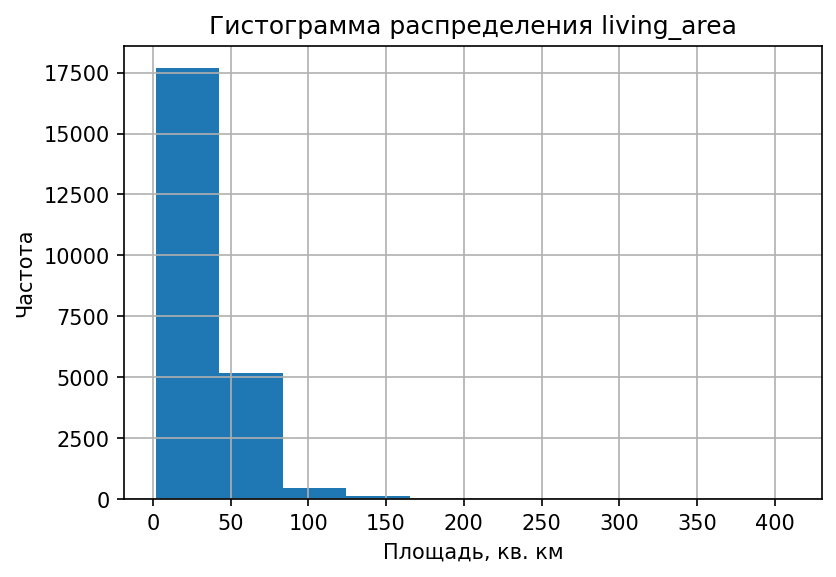

In [80]:
data.hist('living_area')
plt.xlabel('Площадь, кв. км')
plt.ylabel('Частота')
plt.title('Гистограмма распределения living_area')
plt.grid(True)
plt.show()

__Комментарии:__
* данная гистограмма говорит о том, что наибольшее число объявлений (более 17500) о продаже квартир имеет жилую площадь до 40 кв. метров; 
* для наиболее наглядного представления распределения объявлений о продаже квартир установим границы от 0 до 100.

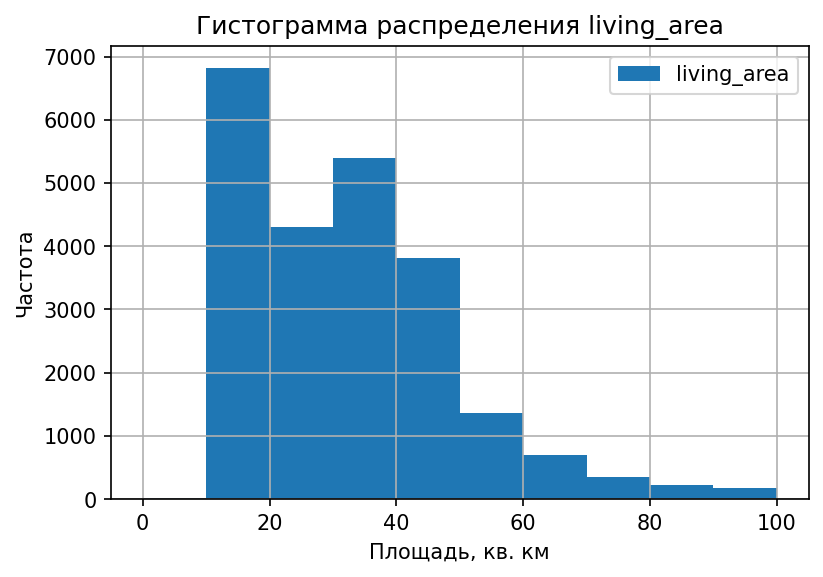

In [81]:
plot_parametrs (data, 'living_area', 0, 100, 10, 'Площадь, кв. км')

Изучим диаграмму размаха значений жилой площади квартиры.

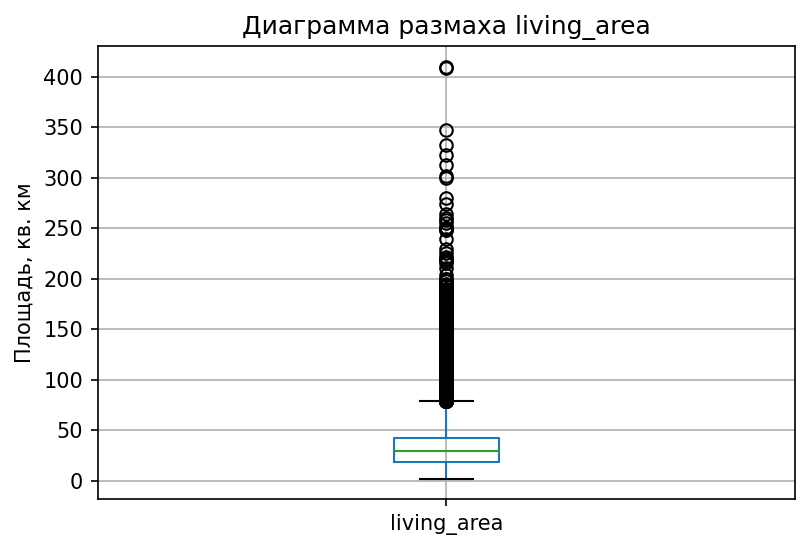

In [82]:
data.boxplot('living_area')
plt.ylabel('Площадь, кв. км')
plt.title('Диаграмма размаха living_area')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 410 кв. метров;
* для наглядного представления диаграммы размаха для жилой площади нарисуем её с ограничениями по оси ординат (0 и 100).

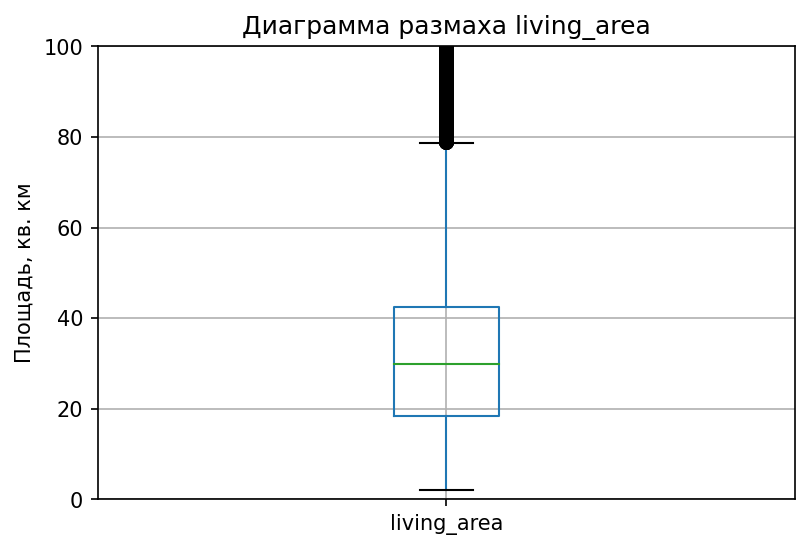

In [83]:
boxplot_parametrs (data, 'living_area', 0, 100, 'Площадь, кв. км')

___Выводы:___
- отличия между медианным и средним арифметическим значением незначительны;
- значения столбца отличаются от среднего на 21,7;
- в гистограмме распределения жилой площади с границами от 0 до 100 наблюдается два пика: от 10 до 20 кв.м. (чуть менее 7000), от 30 до 40 кв. м. (более 5000). Возможно это связано с большим количеством объявлений по студиям и квартир с 2 или 3 комнатами;
- изучив диаграмму размаха можно сказать, что большая часть значений жилой площади лежит в диапазоне примерно от 20 до 40 кв. метров;
- данные по жилой площади содержат выбросы до 410 кв. метров, многие до 350 кв. метров.

__Площадь кухни__

In [84]:
data['kitchen_area'].describe()

count    23322.000000
mean        10.470277
std          5.681062
min          1.300000
25%          7.172500
50%          9.300000
75%         11.700000
max        112.000000
Name: kitchen_area, dtype: float64

Построим гистограмму по столбцу kitchen_area.

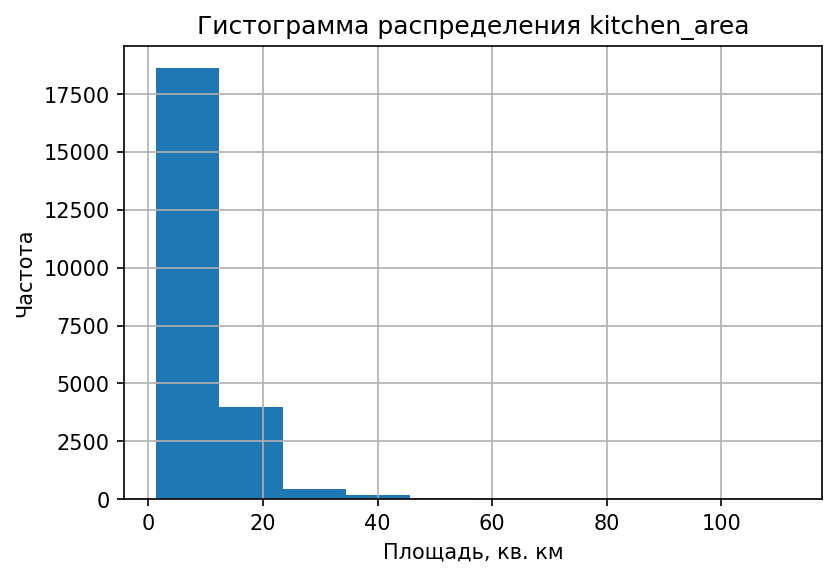

In [85]:
data.hist('kitchen_area')
plt.xlabel('Площадь, кв. км')
plt.ylabel('Частота')
plt.title('Гистограмма распределения kitchen_area')
plt.grid(True)
plt.show()

__Комментарий:__
* данная гистограмма говорит о том, что наибольшее число объявлений (более 17500) о продаже квартир имеет площадь кухни до 10 кв. метров;
* для наиболее наглядного представления распределения объявлений о продаже квартир установим границы от 0 до 40 с числом корзин равным 15.

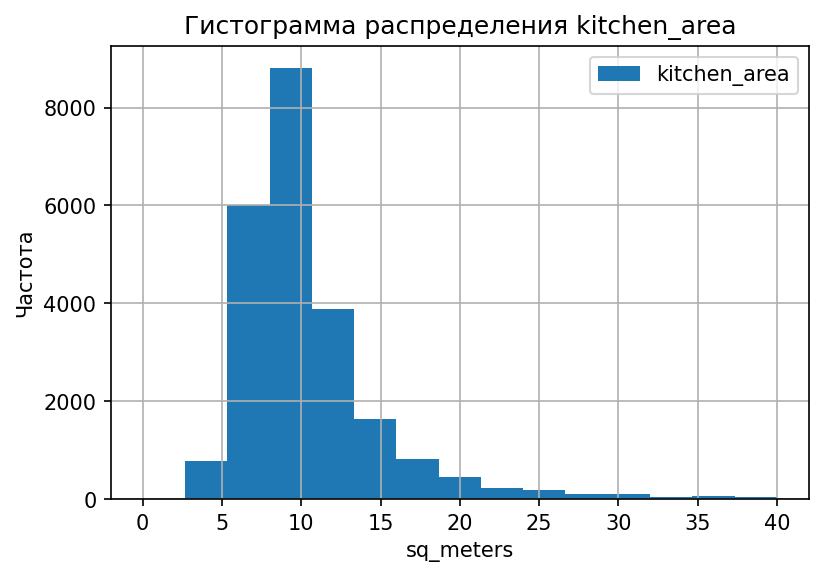

In [86]:
plot_parametrs (data, 'kitchen_area', 0, 40, 15, 'sq_meters')

__Изучим диаграмму размаха значений площади кухни квартиры.__

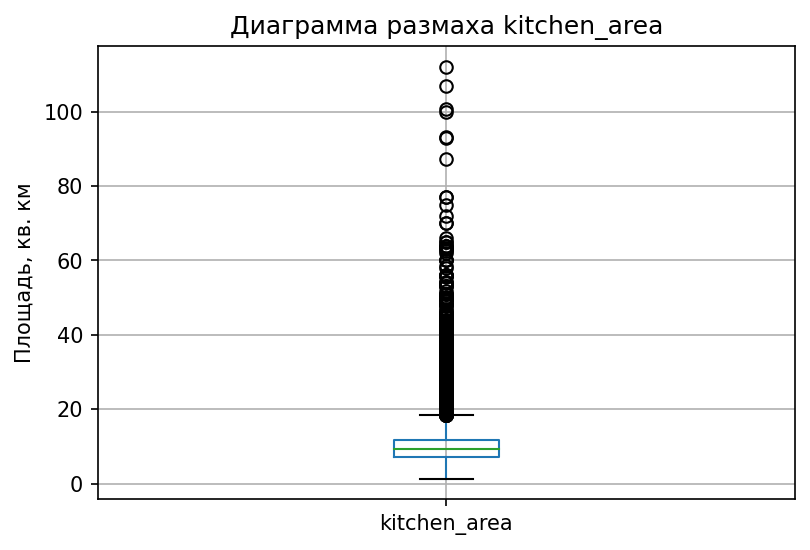

In [87]:
data.boxplot('kitchen_area')
plt.ylabel('Площадь, кв. км')
plt.title('Диаграмма размаха kitchen_area')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 112 кв. метров, большинство до 80 кв. метров;
* для наглядного представления диаграммы размаха для площади кухни нарисуем её с ограничениями по оси ординат (0 и 30).

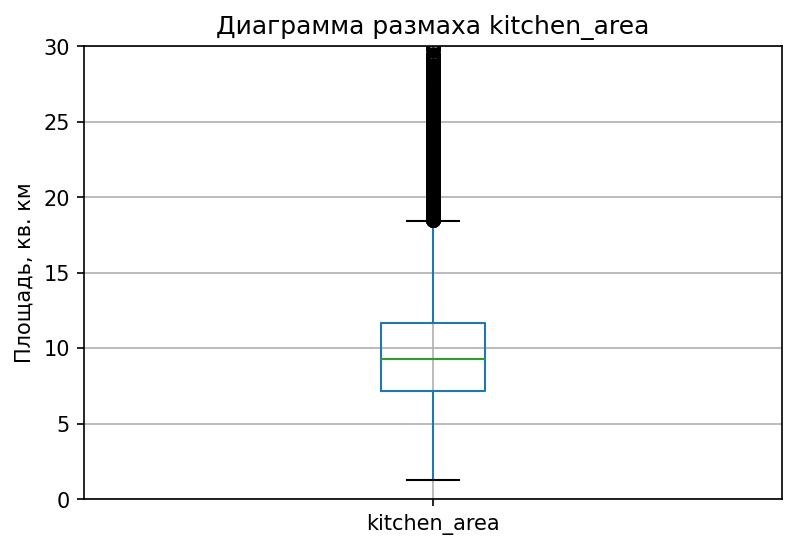

In [88]:
boxplot_parametrs (data, 'kitchen_area', 0, 30, 'Площадь, кв. км')

___Выводы:___
- отличия между медианным и средним арифметическим значением незначительны;
- значения столбца отличаются от среднего на 5,7;
- наибольшее число объявлений о продаже квартир имееют площадь кухни от 7 до 11 кв. м. (более 8000), также значительное число объявлений имеют площадь кухни от 5 до 7 кв. м;
- изучив диаграмму размаха можно сказать, что большая часть значений площади кухни лежит в диапазоне примерно от 7 до 12 кв. метров;
- данные по площади кухни содержат выбросы до 112 кв. метров, большинство до 80 кв. метров.

__Цена квартиры__

In [89]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Построим гистограмму по столбцу last_price.

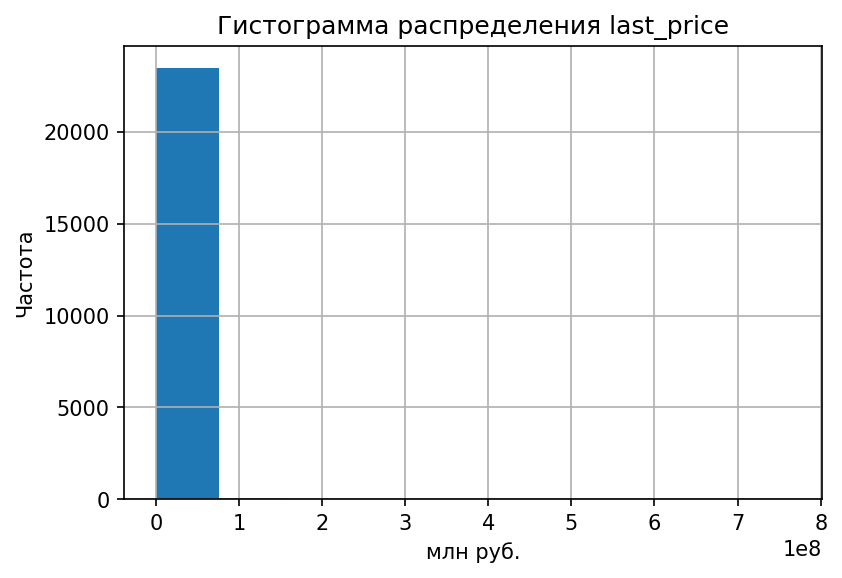

In [90]:
data.hist('last_price')
plt.xlabel('млн руб.')
plt.ylabel('Частота')
plt.title('Гистограмма распределения last_price')
plt.grid(True)
plt.show()

__Комментарий:__
* данная гистограмма говорит, что значительная часть объявлений находится в диапазоне цены до 100 млн рублей, поэтому для наглядности установим границы с учетом базовых данных о столбце.

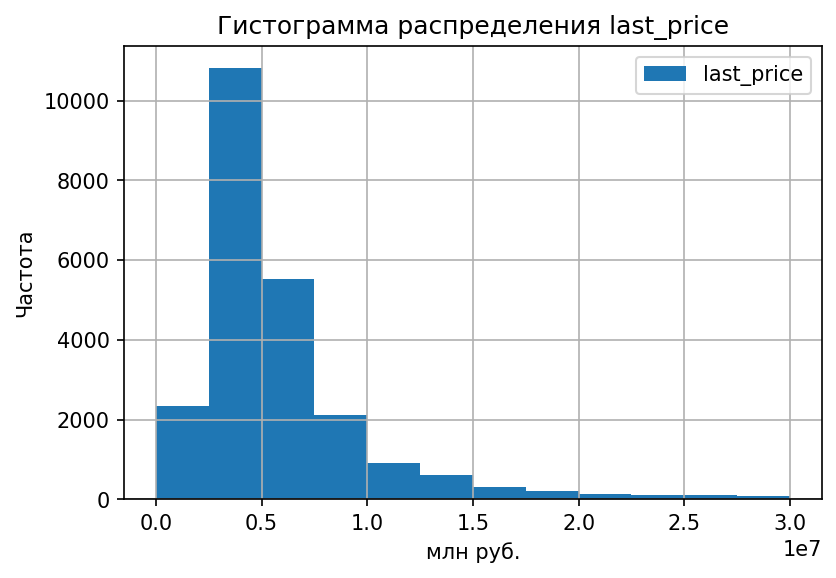

In [91]:
plot_parametrs (data, 'last_price', 0, 30.000000e+06, 12, 'млн руб.')

Изучим диаграмму размаха значений цены квартиры.

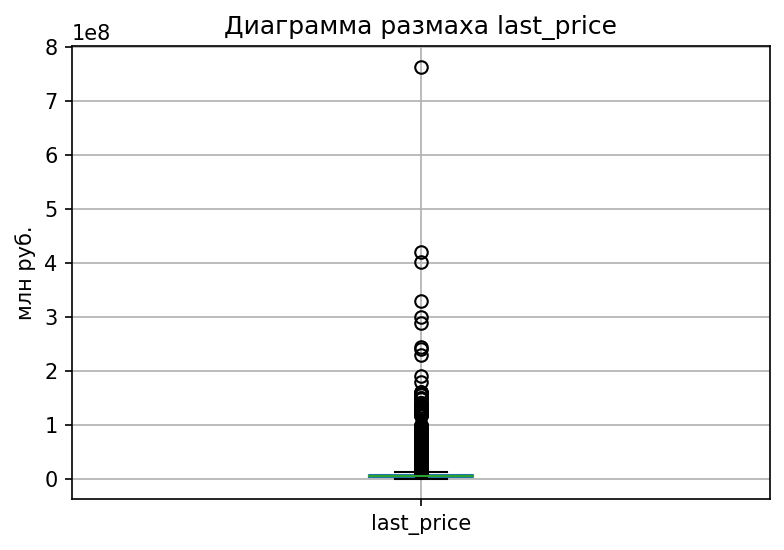

In [92]:
data.boxplot('last_price')
plt.ylabel('млн руб.')
plt.title('Диаграмма размаха last_price')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 800 млн рублей, болшинство до 200 млн рублей;
* для наглядного представления диаграммы размаха для цены квартиры нарисуем её с ограничениями по оси ординат (-5 млн и 20 млн).

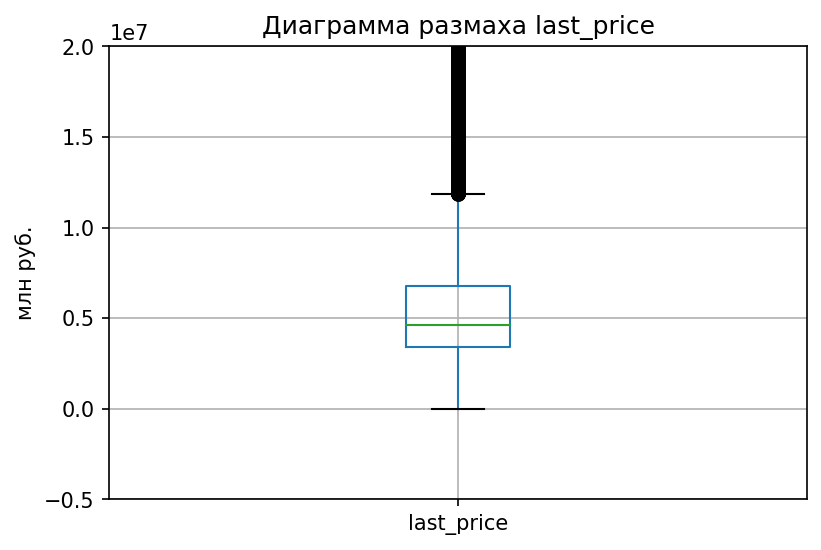

In [93]:
boxplot_parametrs (data, 'last_price', -0.500000e+07, 2.000000e+07, 'млн руб.')

___Выводы:___
- отличия медианное и среднее арифметическое значения заметны;
- значения столбца отличаются от среднего на 1.091093e+07;
- для цены в диапазоне от 0 до 30 млн рублей характерно распределение Пуассона;
- чаще всего в данных встречаются объявления с ценой от 2,5 до 5 млн рублей (почти 12000);
- диаграмма размаха для значений цены за квартиру показала, что данные имеют выбросы достигающие значения до 800 млн рублей, большинство до 200 млн рублей;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 3 до 7 млн рублей. 

__Число комнат__

In [94]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму по столбцу rooms.

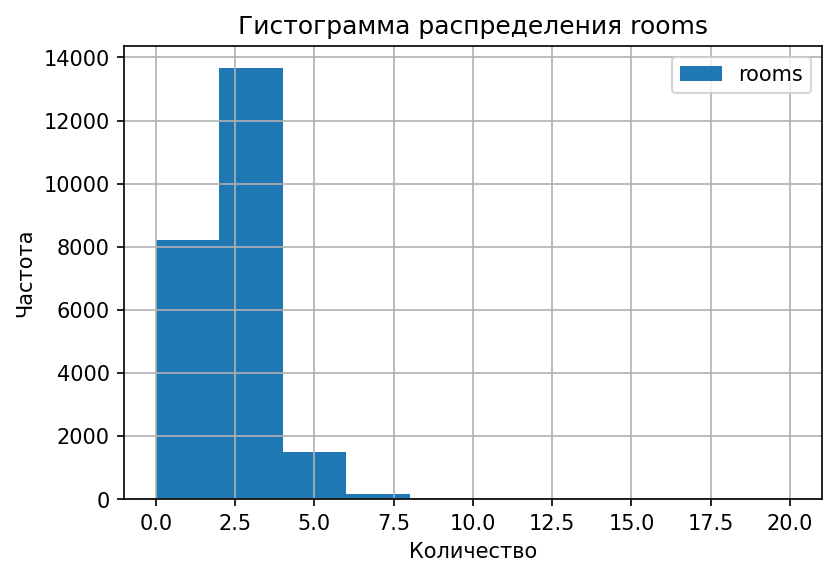

In [95]:
plot_parametrs (data, 'rooms', 0, 20, 10, 'Количество')

Изучим диаграмму размаха значений числа комнат.

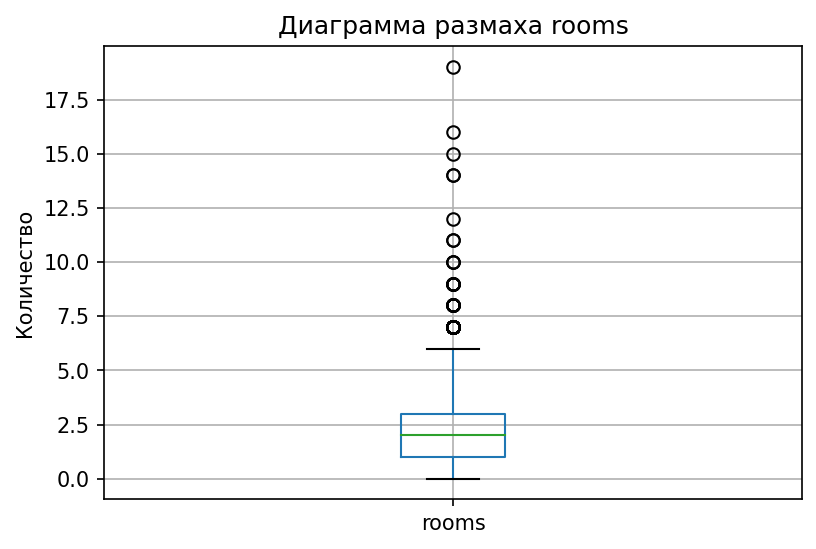

In [96]:
data.boxplot('rooms')
plt.ylabel('Количество')
plt.title('Диаграмма размаха rooms')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 19 комнат, болшинство до 13 комнат;
* для наглядного представления диаграммы размаха для количества комнат нарисуем её с ограничениями по оси ординат (0 и 13).

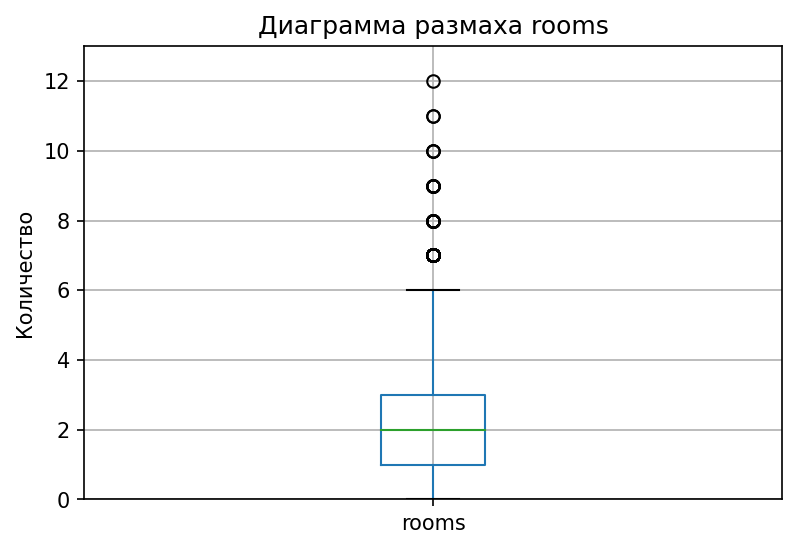

In [97]:
boxplot_parametrs (data, 'rooms', 0, 13, 'Количество')

___Выводы:___
- отличия медианное и среднее арифметическое значения минимальны;
- значения столбца отличаются от среднего на 1,1;
- характерно распределение Пуассона;
- наибольшее число объявлений о продаже квартир имееют от 2 до 3 комнат (почти 14000) и от 0 до 2 (чуть более 8000);
- диаграмма размаха для числа комнат в квартире показала, что данные имеют выбросы, и многие из них до 13 комнат;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 1 до 3 комнат.

__Высота потолков__

In [98]:
data['ceiling_height'].describe()

count    23294.000000
mean         2.703303
std          0.248364
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

Построим гистограмму по столбцу ceiling_height.

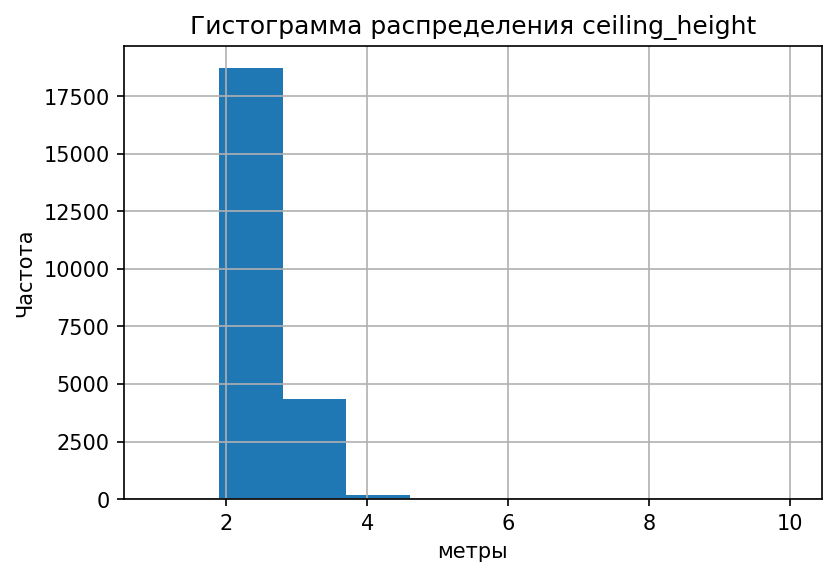

In [99]:
data.hist('ceiling_height')
plt.xlabel('метры')
plt.ylabel('Частота')
plt.title('Гистограмма распределения ceiling_height')
plt.grid(True)
plt.show()

__Комментраий:__
* данная гистограмма говорит, что значительная часть объявлений имеют высоту потолка от 2 до 3 метров. Поэтому для наглядности установим границы с учетом базовых данных о столбце.

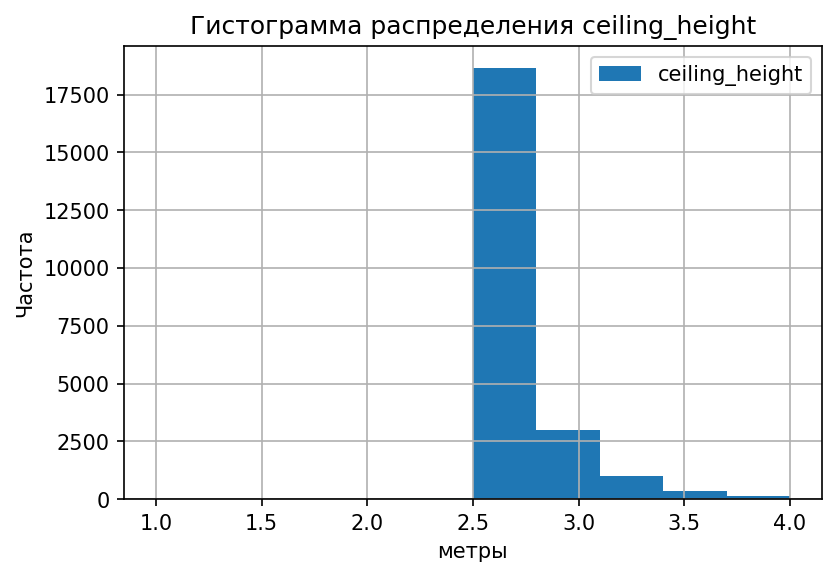

In [100]:
plot_parametrs (data, 'ceiling_height', 1, 4, 10, 'метры')

Изучим диаграмму размаха значений высоты потолка.

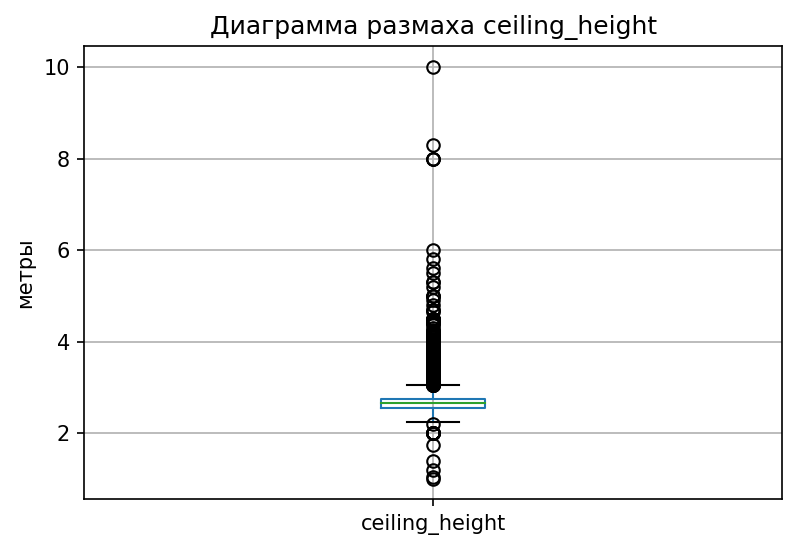

In [101]:
data.boxplot('ceiling_height')
plt.ylabel('метры')
plt.title('Диаграмма размаха ceiling_height')
plt.grid(True)
plt.show()

__Комментарии:__
* обратим внимание, что есть выбросы до 10 метров, болшинство до 6 метров, а также от 1 метра до 2,25 метров;
* для наглядного представления диаграммы размаха для количества комнат нарисуем её с ограничениями по оси ординат (1 и 4).

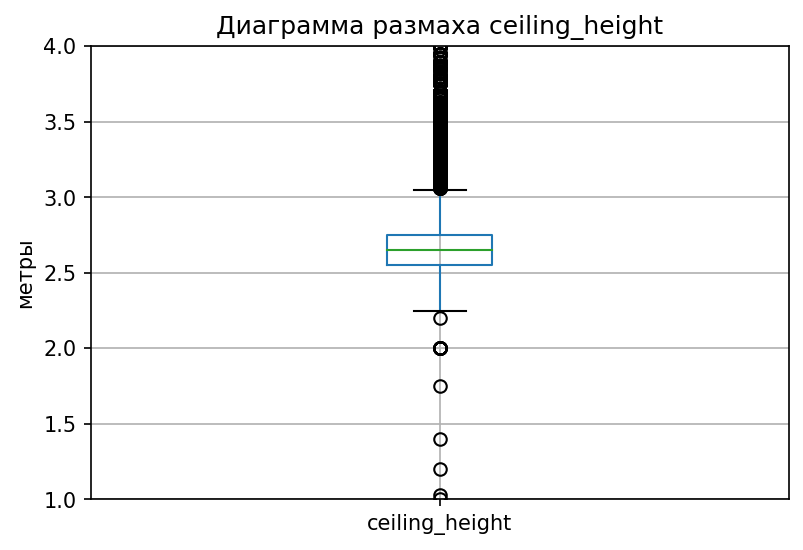

In [102]:
boxplot_parametrs (data, 'ceiling_height', 1, 4, 'метры')

___Выводы:___
- отличия медианное и среднее арифметическое значения минимальны;
- значения столбца отличаются от среднего на 0,2;
- наибольшее число объявлений о продаже квартир имеют высоту потолка от 2,5 до 2,75 метров;
- по результатам изучения диаграммы размаха можно сказать, что есть выбросы до 10 метров, болшинство до 6 метров, а также от 1 метра до 2,25 метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от 2,5 до 2,75 комнат.

<a id='section_2_3'></a>
### 2.3 Время продажи квартир

Изучим общую информацию по столбцу days_exposition. Но учетем, что пустые значения мы заменили на -1.

In [103]:
days_exposition_df = data[data['days_exposition'] >=0]
days_exposition_df ['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

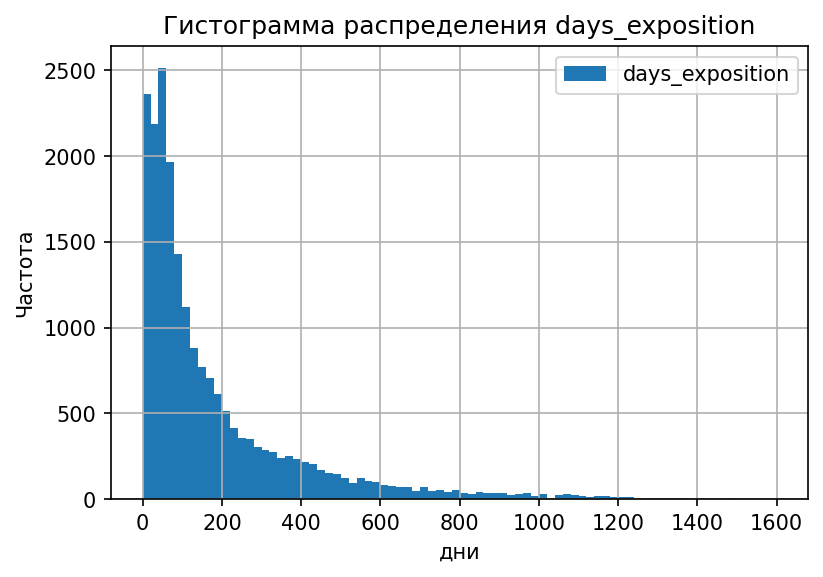

In [104]:
plot_parametrs (days_exposition_df, 'days_exposition', 0, 1600, 80, 'дни')

__Комментарии:__
* наиболее часто встречаются значения в диапазоне от 40 до 60 дней и от 1 до 10 дней. Значения от 600 дней уже редки.

Построим диаграмму размаха для столбца.

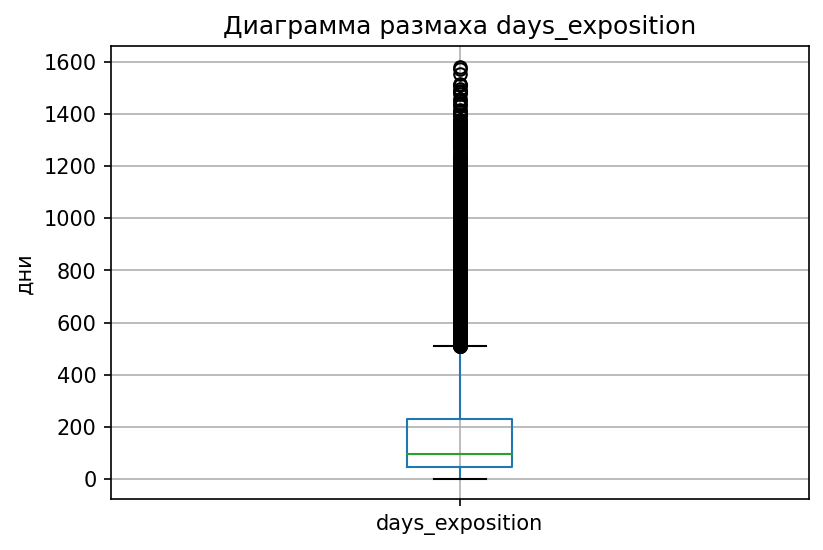

In [105]:
days_exposition_df.boxplot('days_exposition')
plt.ylabel('дни')
plt.title('Диаграмма размаха days_exposition')
plt.grid(True)
plt.show()

__Комментраии:__
* данная диаграмма показывает, что значения от примерно 500 дней являются выбросами.

Для наглядного представления "ящика с усами" впишем ограничения по оси ординат.

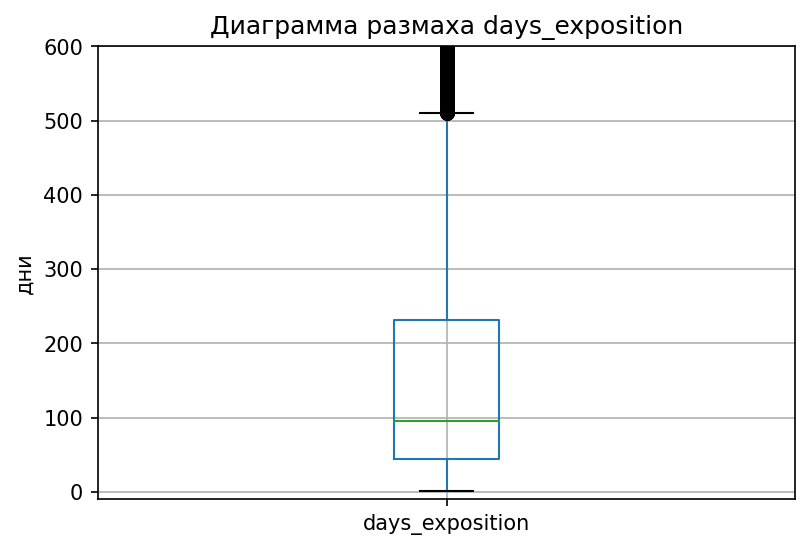

In [106]:
boxplot_parametrs (days_exposition_df, 'days_exposition', -10, 600, 'дни')

__Комментарии:__
* изучив диаграмму размаха можно сказать, что большая часть значений количества дней размещения объявления лежит в диапазоне примерно от 50 до 220 дней.

Сохраним и выведем значения медианы и среднего арифметического для столбца.

In [107]:
median_days_exposition = days_exposition_df['days_exposition'].median()
mean_days_exposition = days_exposition_df['days_exposition'].mean()
print ('Медиана столбца days_exposition: {:.1f}'.format(median_days_exposition))
print ('Среднее арифметическое столбца days_exposition: {:.1f}'.format(mean_days_exposition))

Медиана столбца days_exposition: 95.0
Среднее арифметическое столбца days_exposition: 180.7


__Комментарий:__
* среднее арифметическое почти в 2 раза больше медианы столбца, что говорит о том, что высокие значения сильно смещают среднее вверх.

___Выводы:___
* ссылаясь на гистограмму, диаграмму размаха и медианное значение можно сказать, что в среднем продажа занимает 90-100 дней;
* очень быстрыми продажами можно считать те, продажи, где количество дней с момента публикации объявления меньше первого квартиля, то есть не входящие "ящик";
* необычно долгие продажи выделяются на диаграмме размаха, они расположены за пределами 1,5 межквартильного размаха.

__Работа с аномальными значениями__

Изучив данные о количестве дней размещения объявления о продаже квартиры можно сказать, что имеются аномальные значения. В диаграмме размаха аномальные значения начинаются с 500 дней, гистограмма указывает, что значения от 600 дней уже редки. Для того, чтобы не потерять важные значения отбросим данные, где количестве дней размещения объявления о продаже квартиры больше 600. Выведем график медианы этого показателя по годам.

Text(0.5, 1.0, 'days_exposition_median_per_year')

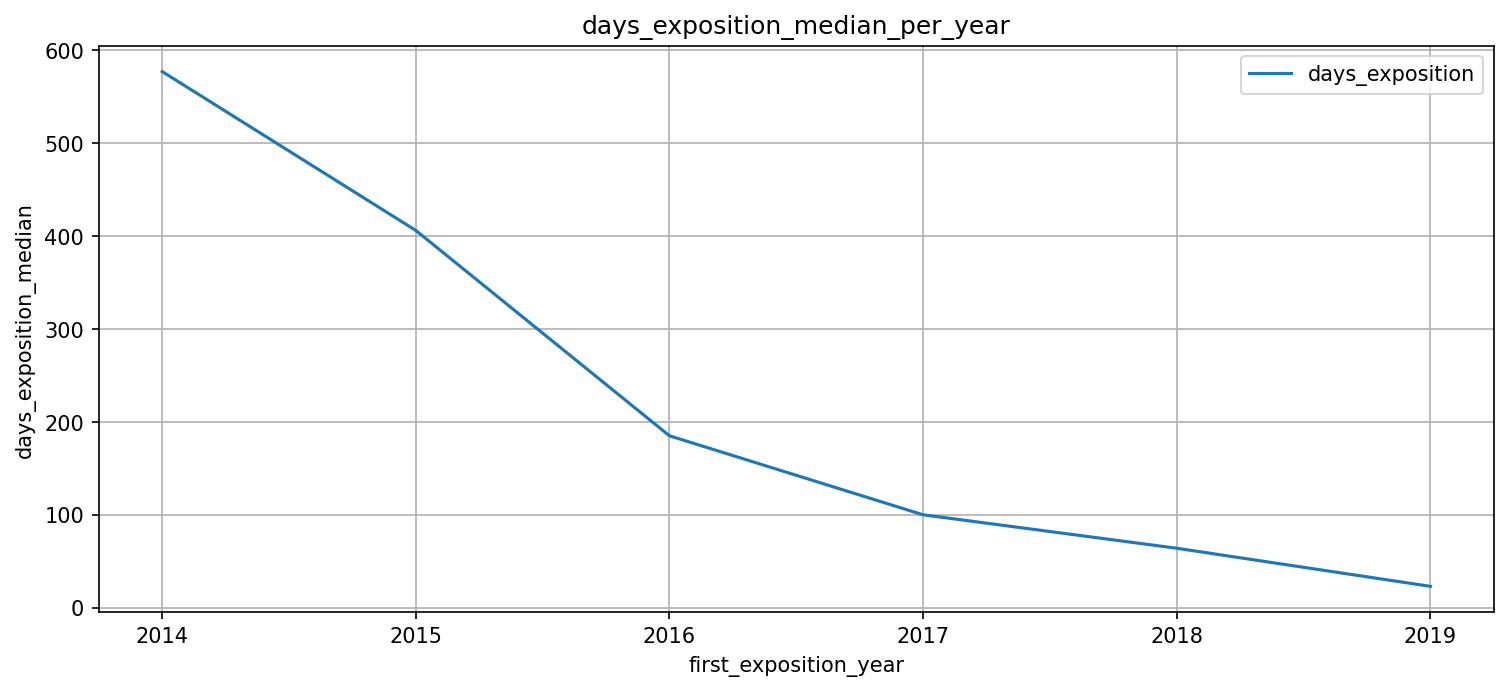

In [108]:
days_exposition_df = days_exposition_df[days_exposition_df['days_exposition'] < 600]

(days_exposition_df
     .pivot_table(index='first_exposition_year', values='days_exposition', aggfunc='median')
     .plot(grid=True, figsize=(12, 5))
)
plt.ylabel ('days_exposition_median')
plt.title ('days_exposition_median_per_year')

__Комментарии:__
* график идет по наклонной вниз. Можно заметить, что высокие значения количества дней характерны для ранних годов (2014-2016). Очевидно, что для более ранних годов будут встречаться более высокие значения, чем для поздних годов, так как для 2014 года прошло больше дней до момента разработки датафрейма, чем для 2018 или 2019 года. Возможно, что высокие значения связаны с тем, что объявления не были сняты сразу после продажи, но это установить доподлинно мы не можем.

<a id='section_2_4'></a>
### 2.4 Определение наиболее влияющих факторов на стоимость квартиры

Для определения наиболее влияющих факторов на стоимость квартиры необходимо определить зависит ли цена от квадратного метра, числа комнат, этажа, удаленности от центра и даты размещения (дни недели, месяца).

Зависимость показателей поможет определить диаграмма рассеивания и коэф. корреляции.

__Зависимость цены от квдратного метра квартиры__

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,total_area
last_price,1.000000,0.633836
total_area,0.633836,1.000000


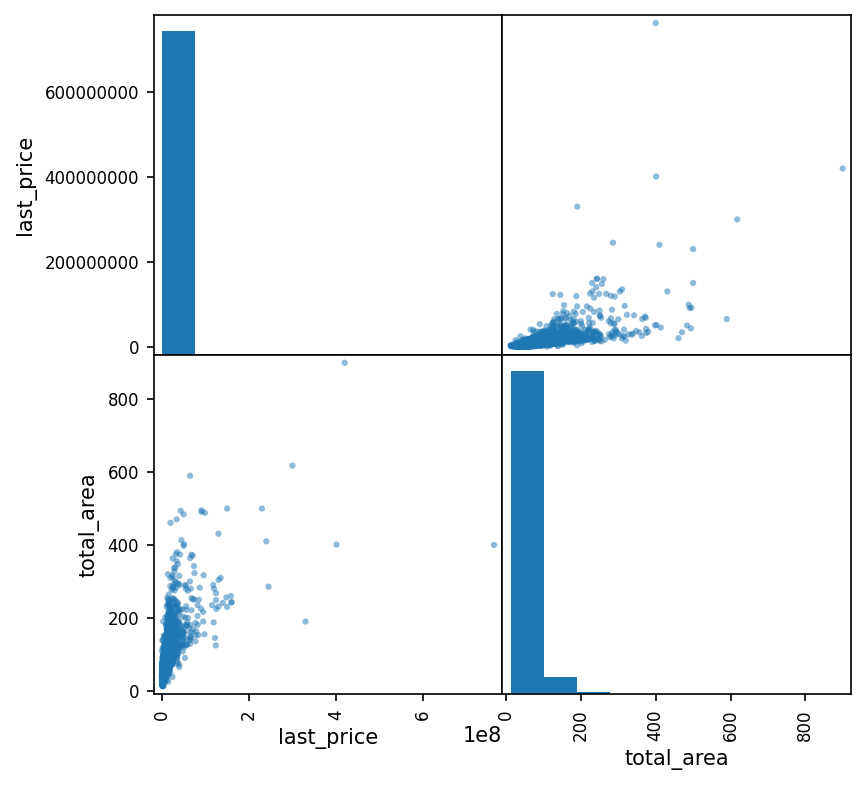

In [109]:
def plotting (col_1, col_2):
    df = []
    col = [col_1, col_2]
    df = days_exposition_df[col]
    return pd.plotting.scatter_matrix(df, figsize=(6, 6)) 

def corr (col_1, col_2):
    df = []
    col = [col_1, col_2]
    df = days_exposition_df[col]
    return df.corr()

plotting ('last_price', 'total_area')
corr ('last_price', 'total_area')

__Комментарии:__

- Коэф. корреляции позволяет сказать, что между показателями наблюдается средняя степень связи;
- Диаграмма рассеивания сначала показывает связь между показателями, но потом перестает быть устойчивой.

__Зависимость цены от количества комнат__

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,rooms
last_price,1.000000,0.345541
rooms,0.345541,1.000000


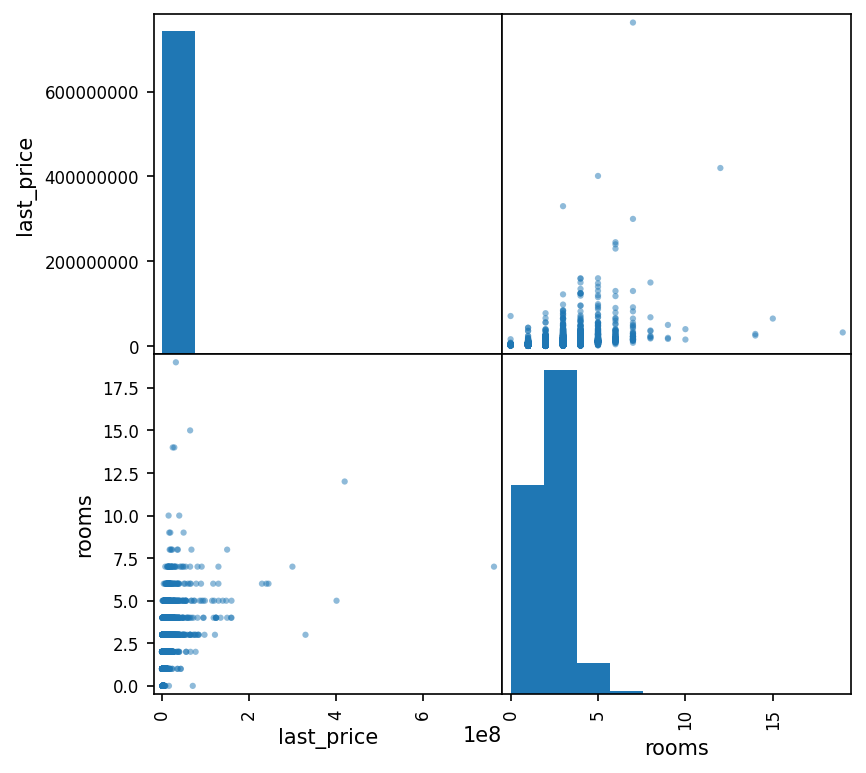

In [110]:
plotting ('last_price', 'rooms')
corr ('last_price', 'rooms')

##### Выводы:

- Коэф. корреляции позволяет сказать, что между показателями наблюдается слабая степень связи;
- Диаграмма рассеивания до 5 комнат и 200 млн показывает связь, но потом перестает быть устойчивой.

#### Зависимость цены от  расстояния до центра города

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,cityCenters_nearest
last_price,1.000000,-0.042277
cityCenters_nearest,-0.042277,1.000000


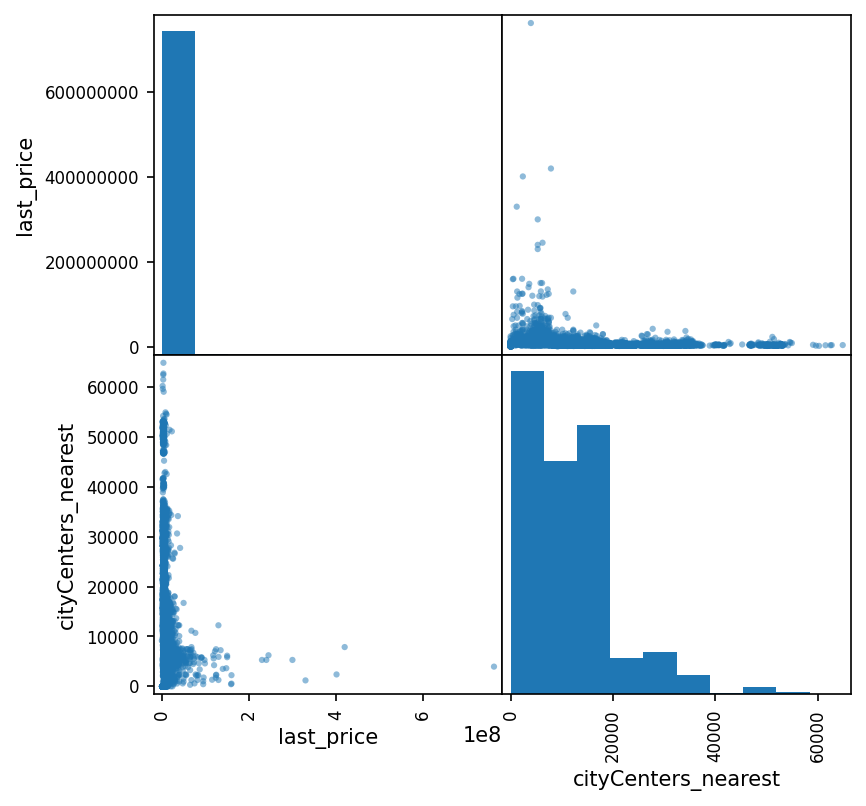

In [111]:
plotting ('last_price', 'cityCenters_nearest')
corr ('last_price', 'cityCenters_nearest')

__Комментарии:__

- Коэф. корреляции позволяет сказать, что между показателями наблюдается очень слабая отрицательная степень связи;
- Диаграмма рассеивания не позволяет выявить связь показателей.

__Зависимость цены от дня недели публикации объявления__

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,first_exposition_day_of_week
last_price,1.00000,0.00488
first_exposition_day_of_week,0.00488,1.00000


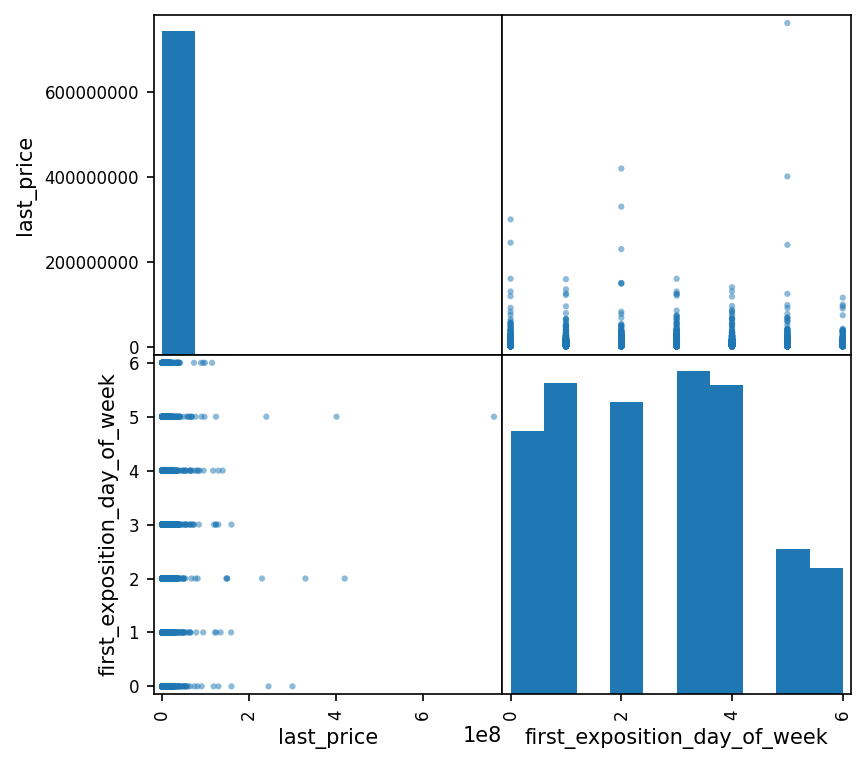

In [112]:
plotting ('last_price', 'first_exposition_day_of_week')
corr ('last_price', 'first_exposition_day_of_week')

__Комментарии:__

- Коэф. корреляции позволяет сказать, что между показателями цены и днем недели публикации объявления наблюдается очень слабая степень связи;
- Диаграмма рассеивания не позволяет выявить связь показателей.

__Зависимость цены от месяца публикации объявления__

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,first_exposition_month
last_price,1.000000,0.004501
first_exposition_month,0.004501,1.000000


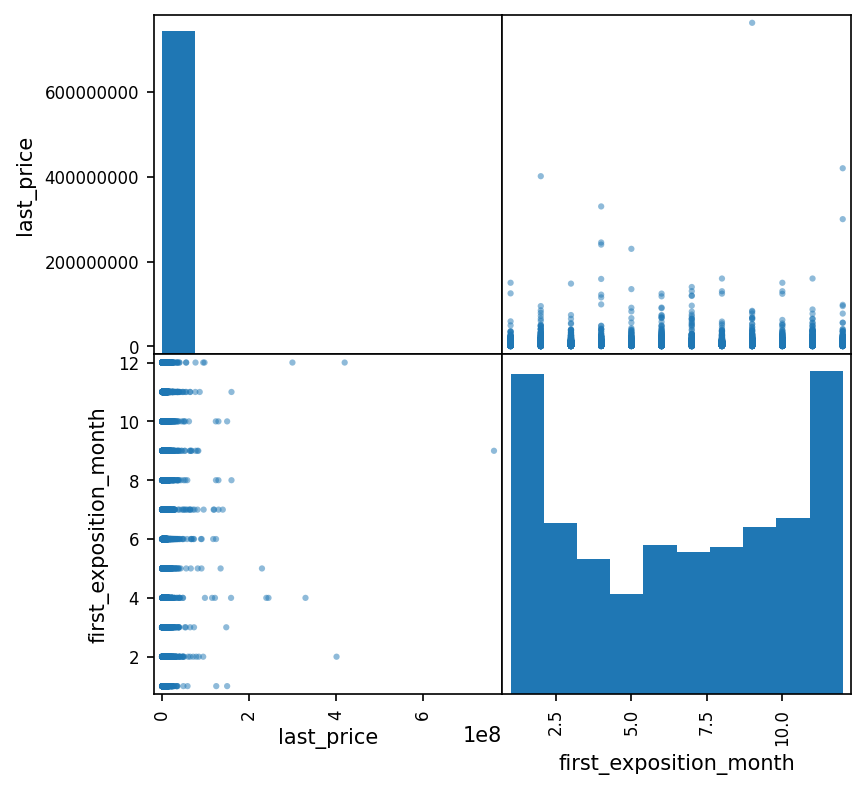

In [113]:
plotting ('last_price', 'first_exposition_month')
corr ('last_price', 'first_exposition_month')

__Комментарии:__

- Коэф. корреляции позволяет сказать, что между показателями цены и месяцем публикации объявления наблюдается очень слабая степень связи;
- Диаграмма рассеивания не позволяет выявить связь показателей.

__Зависимость цены от года публикации объявления__

Построим диаграмму рассеивания двух показателей и посчитаем корреляцию этих показателей.

,last_price,first_exposition_year
last_price,1.000000,-0.042708
first_exposition_year,-0.042708,1.000000


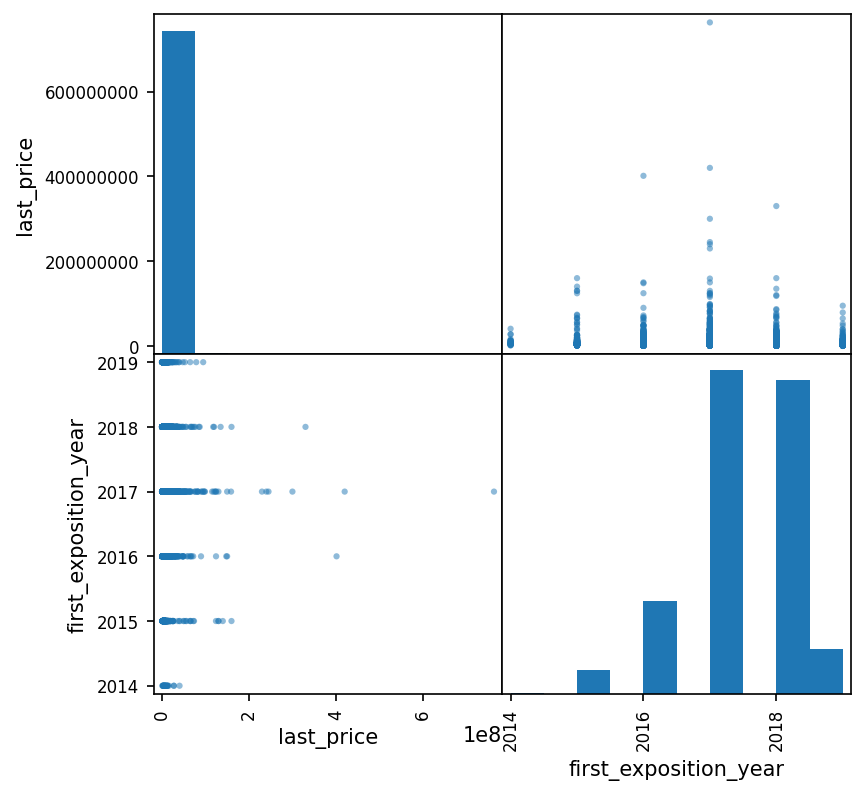

In [114]:
plotting ('last_price', 'first_exposition_year')
corr ('last_price', 'first_exposition_year')

__Комментарии:__

- Коэф. корреляции позволяет сказать, что между показателями цены и годом публикации объявления наблюдается очень слабая отрицательная степень связи;
- Диаграмма рассеивания не позволяет выявить связь показателей.

__Зависимость цены от этажа квартиры__

Для выявления зависимости цены от этажа квартиры построим столбчатую диаграмму для всех возможных типов этажей.

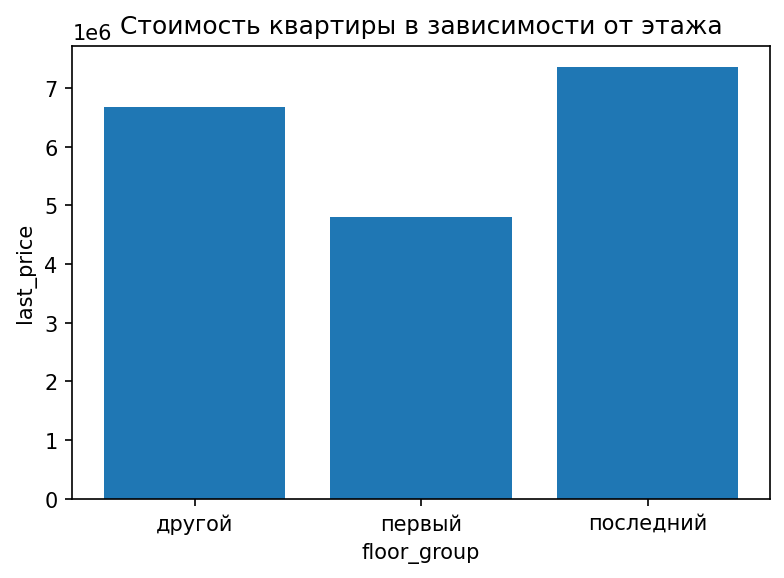

In [115]:
tmp = data.groupby('floor_group')['last_price'].mean()
plt.bar(tmp.index, tmp.values)
plt.ylabel('last_price')
plt.xlabel('floor_group')
plt.title ('Стоимость квартиры в зависимости от этажа')
plt.show()

__Комментарии:__

- диаграмма позволяет установить, что есть прямая связь между ценой квартиры и этажом, то есть, чем выше этаж, тем выше стоимость квартиры.

__Общий вывод:__
- заметная связь цены квартиры наблюдается с показателями площади и этажа квартиры.

__Изучим, есть ли разница в цене в зависимости от населенного пункта__

Создадим срез из 10 населенных пунктов с наибольшим числом объявлений.

In [116]:
data_grouped = (
    days_exposition_df
                    .pivot_table(index='locality_name', values=['price_per_sq_meter','total_area'], aggfunc=['mean','count'])
    )
data_grouped.columns = ['price_per_sq_meter_mean','total_area_mean','price_per_sq_meter_count','number_of_sale']
data_grouped_columns = ['price_per_sq_meter_mean', 'number_of_sale']
top10_cities = data_grouped[data_grouped_columns]
top10_cities = top10_cities.sort_values(by='number_of_sale',ascending=False).head(10)
top10_cities.sort_values(by='price_per_sq_meter_mean',ascending=False)

,price_per_sq_meter_mean,number_of_sale
locality_name,,
Санкт-Петербург,111915.701916,12738
Пушкин,101893.947735,287
деревня Кудрово,92706.195652,276
посёлок Парголово,89300.361775,293
посёлок Мурино,85884.626263,495
посёлок Шушары,77825.989822,393
Колпино,74712.591973,299
Всеволожск,68641.242138,318
Гатчина,68125.936000,250


__Общий вывод:__
- Самая высокая цена жилья наблюдается в Санкт-Петербурге, Пушкине и Кудрово.
- Самая низкая стоимость жилья наблюдается в Выборге, Гатчине и Всеволожске, что можно объяснить тем, данные населенные пункты относятся к Ленинградской области и расположены на значительном расстоянии в отличие от остальных населенных пунктов (кроме Мурино).

<a id='section_2_5'></a>
### 2.5 Зависимость цены от удаленности от центра

- Создадим датафрейм с данными по Санкт-Петербургу;
- Сгруппируем целочисленные значения расстояния до центра в километрах по средней цене кв. метра жилья;
- Создадим график по этим показателям.

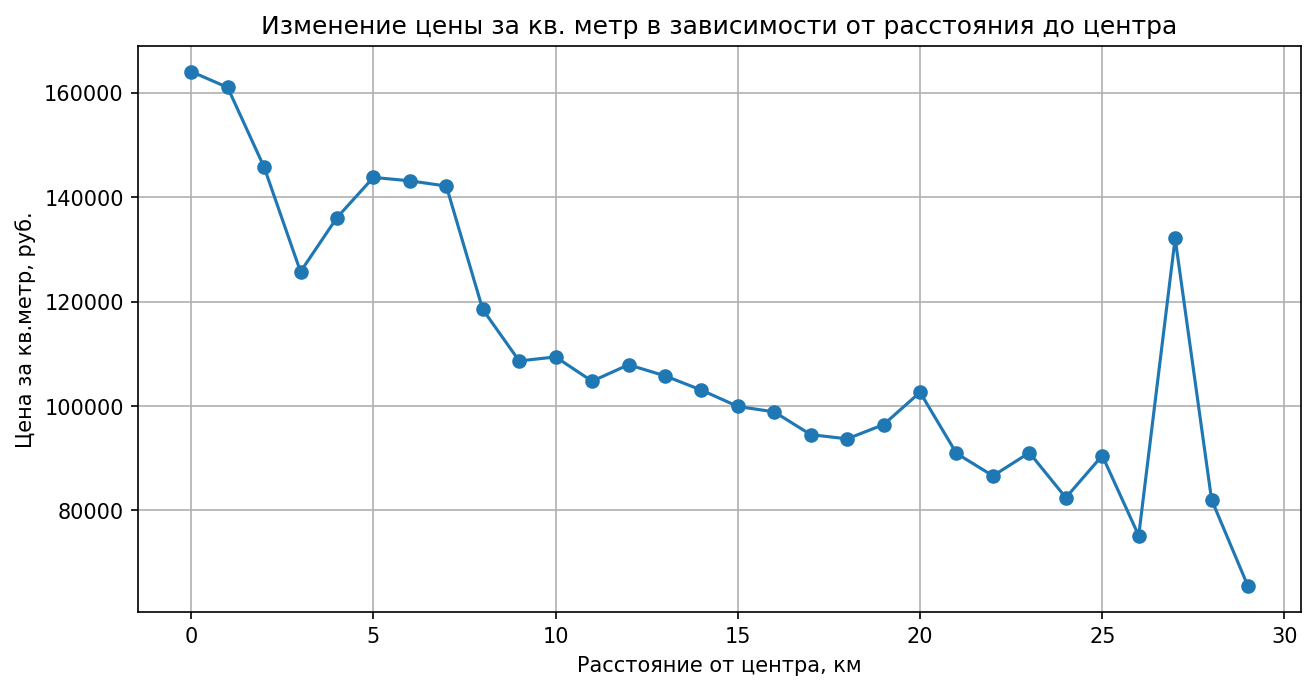

In [117]:
spb_data = days_exposition_df.query('locality_name == "Санкт-Петербург"')
spb_distance_to_centre = spb_data.groupby('center_distance_km')['price_per_sq_meter'].mean()
spb_distance_to_centre.plot(x='center_distance_km', y='price_per_sq_meter', title='Изменение цены за кв. метр в зависимости от расстояния до центра', style='o-', grid=True, figsize=(10, 5))
plt.ylabel ('Цена за кв.метр, руб.')
plt.xlabel ('Расстояние от центра, км')
plt.show();

__Вывод:__ 
- по результатам анализа графика изменений средней цены за кв. метр жилья от расстояния до центра в километрах можно определить центральную зону, которая находится в радиусе 7 километров (резкое снижение средней цены за кв. метр на 8 км по отношению к 7 км).

<a id='section_2_6'></a>
### 2.6 Изучение параметров квартир центре Санкт-Петербурга

Создадим датафрейм центра Санкт-Петербурга

In [118]:
centre_spb_data = spb_data.query('center_distance_km <= 7')

__Общая площадь__

Создадим функцию для построения гистограммы для двух датасетов.

In [119]:
def plot_parametrs_two_df (df1, df2, column, x1, x2, n_bins, xlabel):
    plt.hist(df1[column], alpha=0.5, label='spb_data', range=(x1, x2), bins=n_bins)
    plt.hist(df2[column], alpha=0.5, label='centre_spb_data', range=(x1, x2), bins=n_bins)
    plt.legend()
    plt.grid(True)
    plt.xlabel (xlabel)
    plt.ylabel ('Частота')
    plt.title ("Гистограмма распределения " + str(column))
    plt.show()    

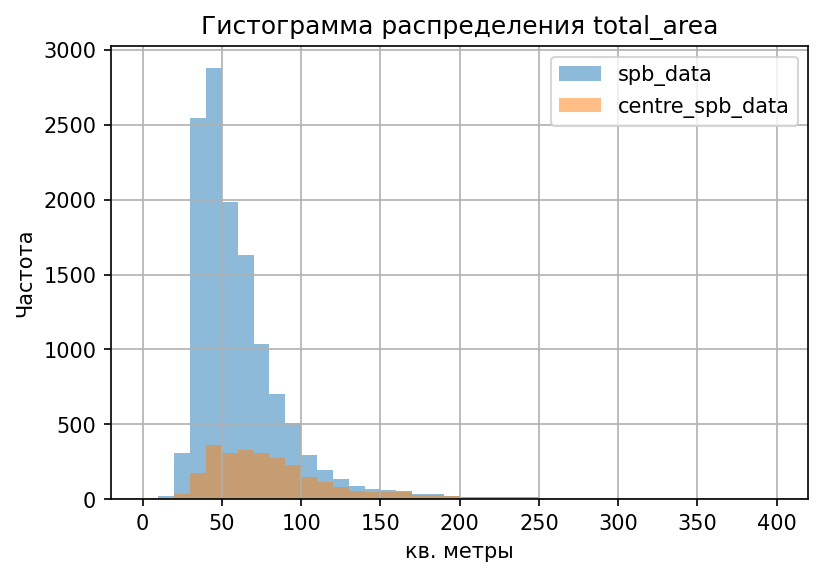

In [120]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'total_area', 0, 400, 40, 'кв. метры')

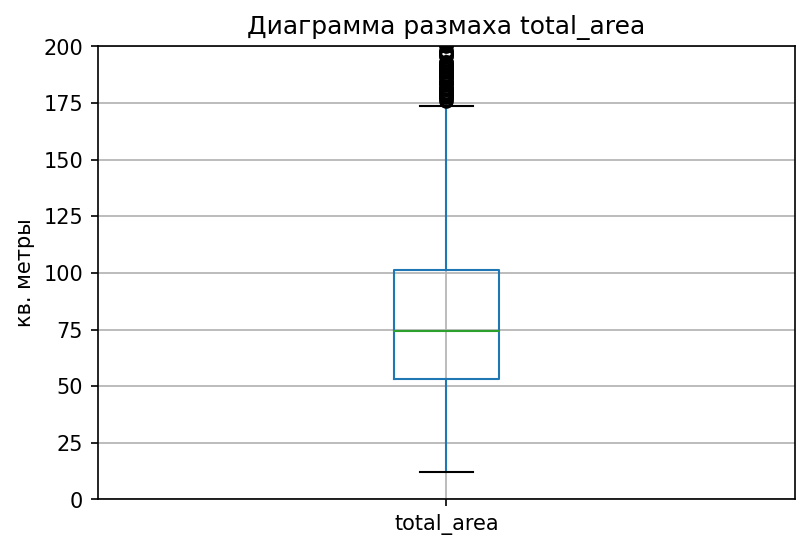

In [121]:
boxplot_parametrs (centre_spb_data, 'total_area', 0, 200, 'кв. метры')

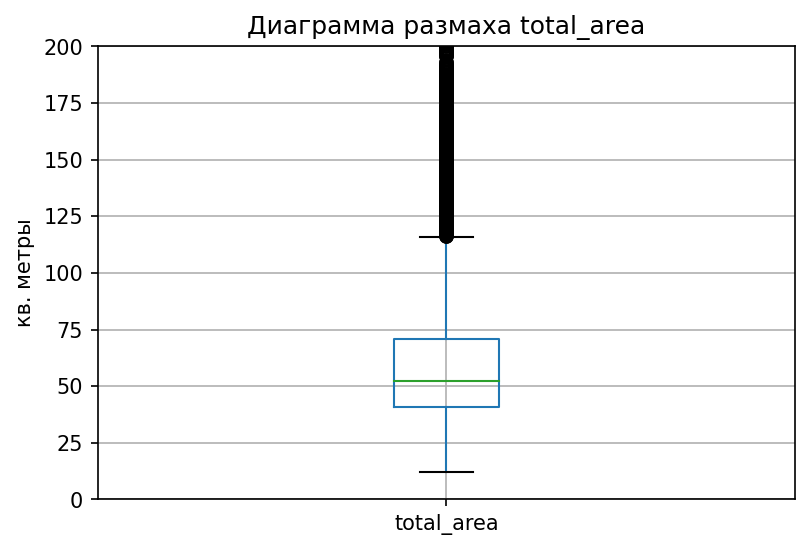

In [122]:
boxplot_parametrs (spb_data, 'total_area', 0, 200, 'кв. метры')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с общей площадью от 30 до 40 млн кв. метров (примерно 2500) и от 40 до 50 кв. метров (более 2750);
- диаграмма размаха для значений общей площади квартиры показала, что данные имеют выбросы достигающие значения от 125 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 40 до 75 кв. метров.

### Центр Санкт-Петербурга
   
- нет заметно выделяющегося диапазона кв. метров общей площади, диапазоны от 40 до 100 кв. метров имеют примерно равное распределение;
- диаграмма размаха для значений общей площади квартиры показала, что данные имеют выбросы достигающие значения от 175 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 50 до 100 кв. метров;

### Различия
- для центра Санкт-Петербурга нет характерного диапазона общей площади, распределение между диапазонами (от 40 до 100 кв. метров) примерно равное;
- значения "ящика" для центра Санкт-Петербурга выше, чем для Санкт-Петербурга в целом, то есть характерная общая площадь для центра города больше, чем в целом по городу. 

__Жилая площадь__

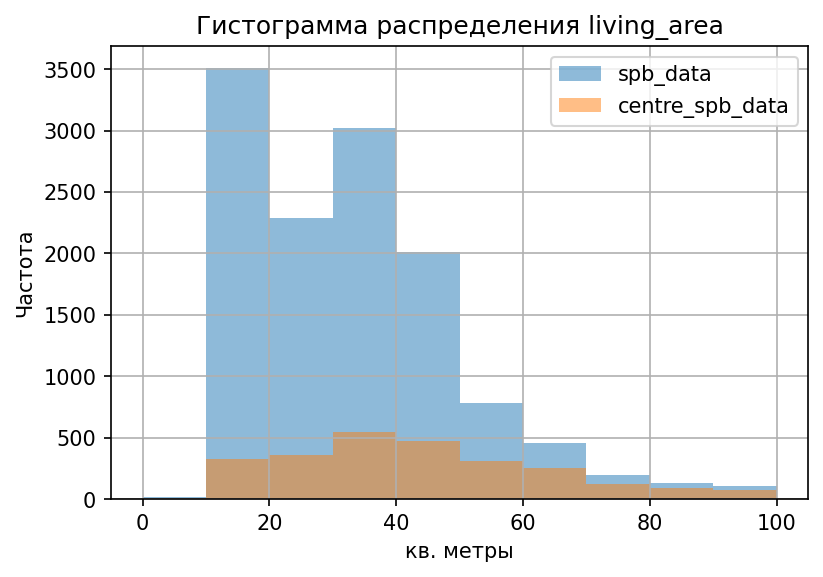

In [123]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'living_area', 0, 100, 10, 'кв. метры')

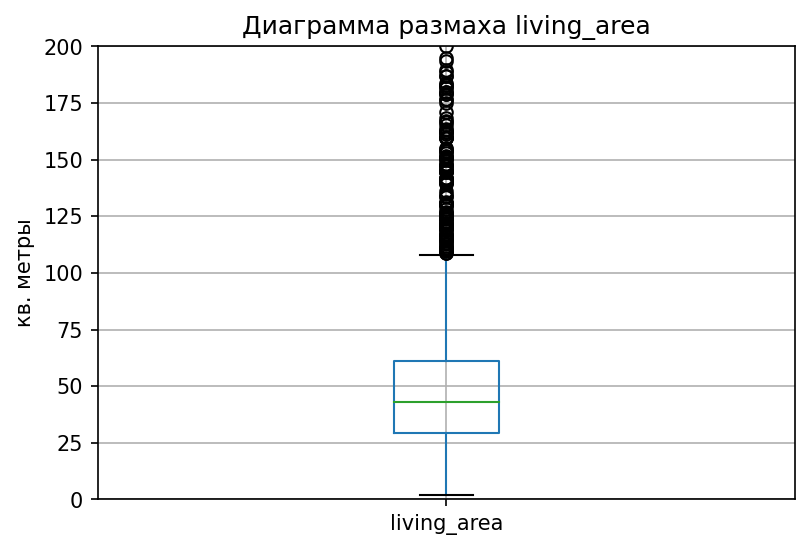

In [124]:
boxplot_parametrs (centre_spb_data, 'living_area', 0, 200, 'кв. метры')

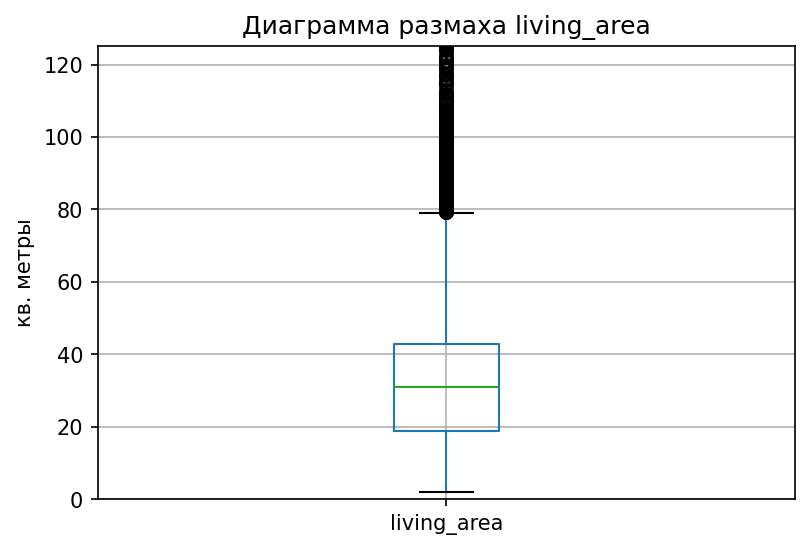

In [125]:
boxplot_parametrs (spb_data, 'living_area', 0, 125, 'кв. метры')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с жилой площадью от 10 до 20 кв. метров (примерно 3500) и от 30 до 40 кв. метров (более 3000);
- диаграмма размаха для значений жилой площади квартиры показала, что данные имеют выбросы достигающие значения от 80 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 20 до 45 кв. метров.

### Центр Санкт-Петербурга
   
- наиболее часто в данных встречаются объявления с жилой площадью от 30 до 40 кв. метров (примерно 500);
- диаграмма размаха для значений жилой площади квартиры показала, что данные имеют выбросы достигающие значения от 110 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 30 до 60 кв. метров;

### Различия
- характерные значения жилой площади для центра Санкт-Петербурга выше характерных общегородских значений;

__Площадь кухни__

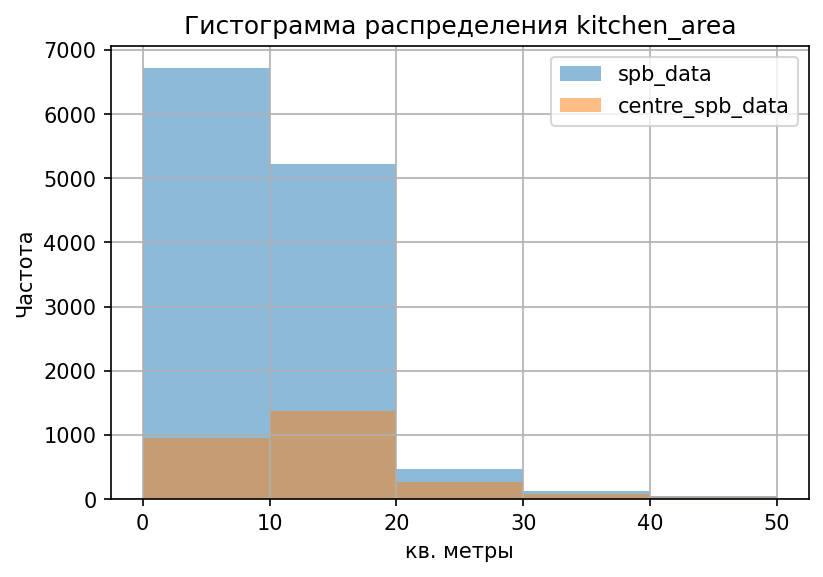

In [126]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'kitchen_area', 0, 50, 5, 'кв. метры')

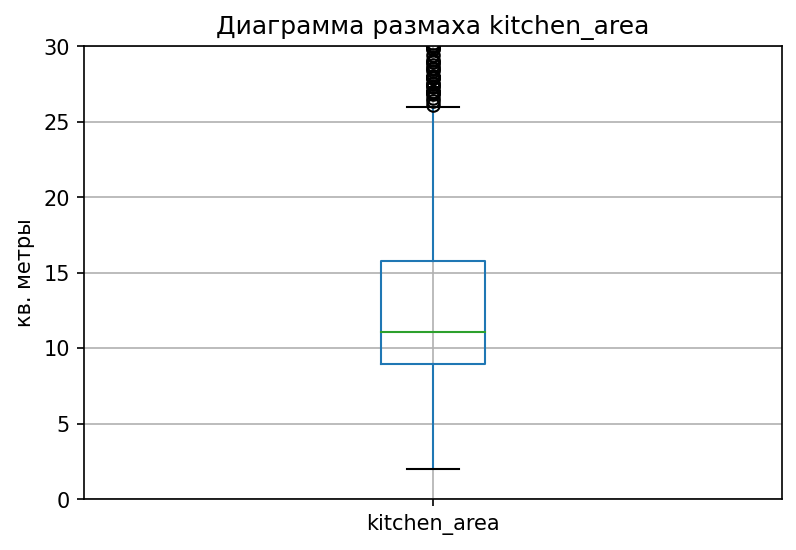

In [127]:
boxplot_parametrs (centre_spb_data, 'kitchen_area', 0, 30, 'кв. метры')

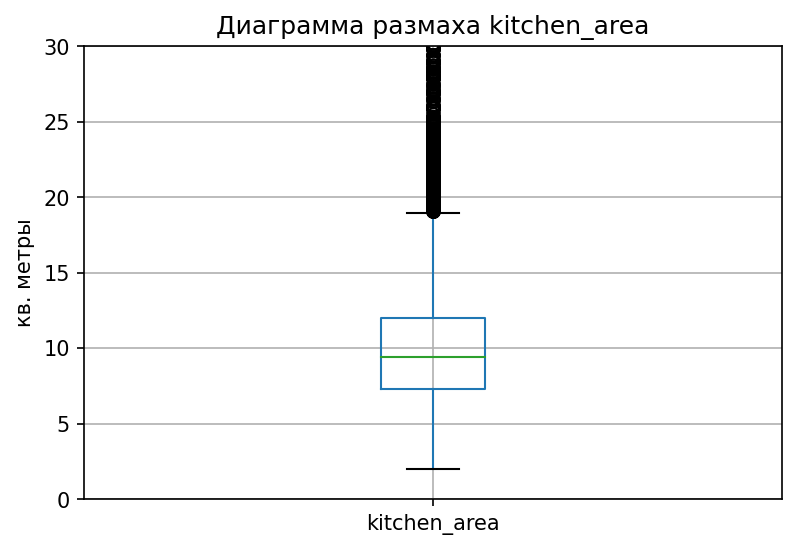

In [128]:
boxplot_parametrs (spb_data, 'kitchen_area', 0, 30, 'кв. метры')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с площадью кухни до 10 кв. метров (примерно 6500);
- диаграмма размаха для значений площади кухни квартиры показала, что данные имеют выбросы достигающие значения от 20 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 7 до 12 кв. метров.

### Центр Санкт-Петербурга
   
- наиболее часто в данных встречаются объявления с площадью кухни от 10 до 20 кв. метров (менее 1500);
- диаграмма размаха для значений площади кухни квартиры показала, что данные имеют выбросы достигающие значения от примерно 25 кв. метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 9 до 16 кв. метров;

### Различия
- характерные значения площади кухни для центра Санкт-Петербурга выше характерных общегородских значений;

__Цена квартиры__

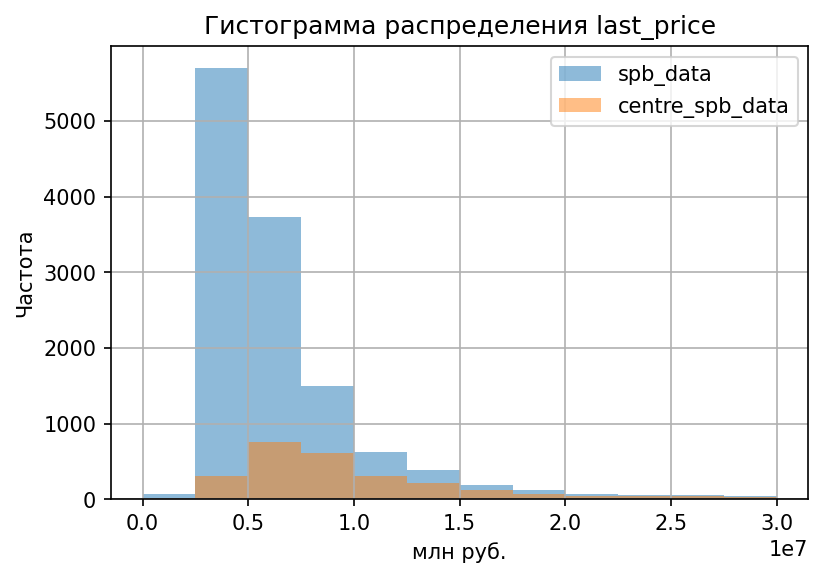

In [129]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'last_price', 0, 30.000000e+06, 12, 'млн руб.')

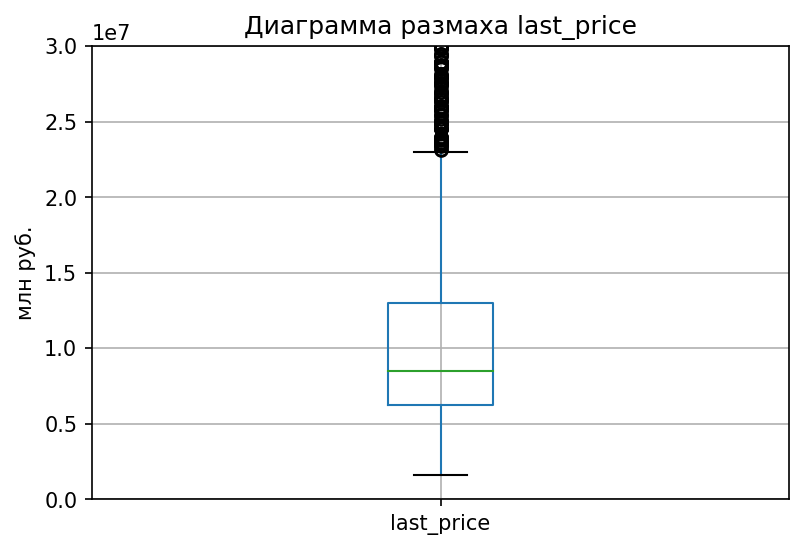

In [130]:
boxplot_parametrs (centre_spb_data, 'last_price', 0, 3.000000e+07, 'млн руб.')

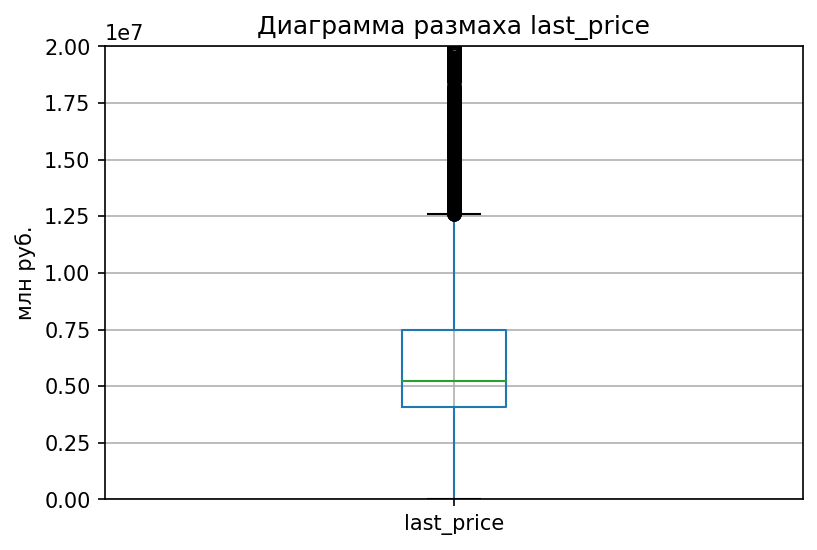

In [131]:
boxplot_parametrs (spb_data, 'last_price', 0, 2.000000e+07, 'млн руб.')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с ценой примерно от 3 до 5 млн рублей (более 4500);
- диаграмма размаха для значений цены квартиры показала, что данные имеют выбросы достигающие значения от 12 млн рублей;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 4 до 7,5 млн рублей.

### Центр Санкт-Петербурга
   
- наиболее часто в данных встречаются объявления с ценой от 5 до 7,5 млн рублей (примерно 700) и от 7,5 до 10 млн рублей (примерно 600);
- диаграмма размаха для значений цены квартиры показала, что данные имеют выбросы достигающие значения от примерно 24 млн рублей;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от примерно 6 до 13 млн рублей;

### Различия
- характерные значения цены квартиры для центра Санкт-Петербурга выше характерных значений в целом по городу;

__Количество комнат__

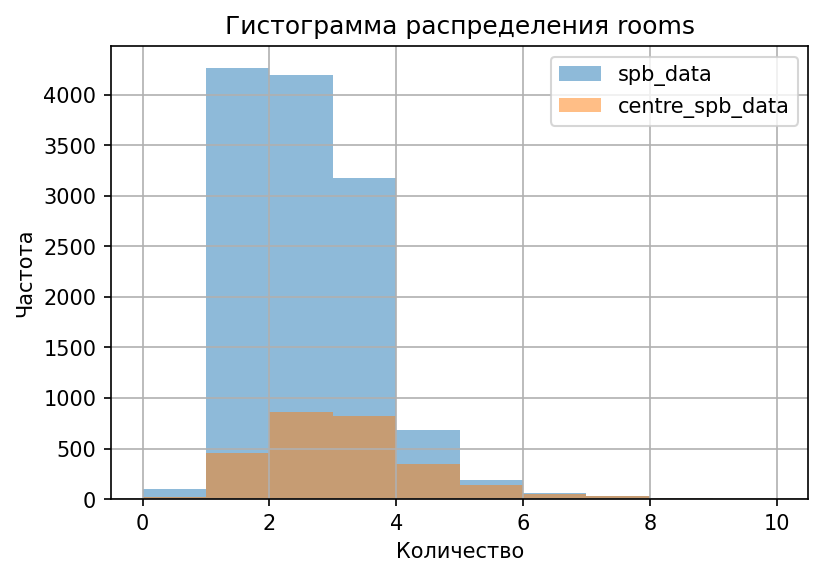

In [132]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'rooms', 0, 10, 10, 'Количество')

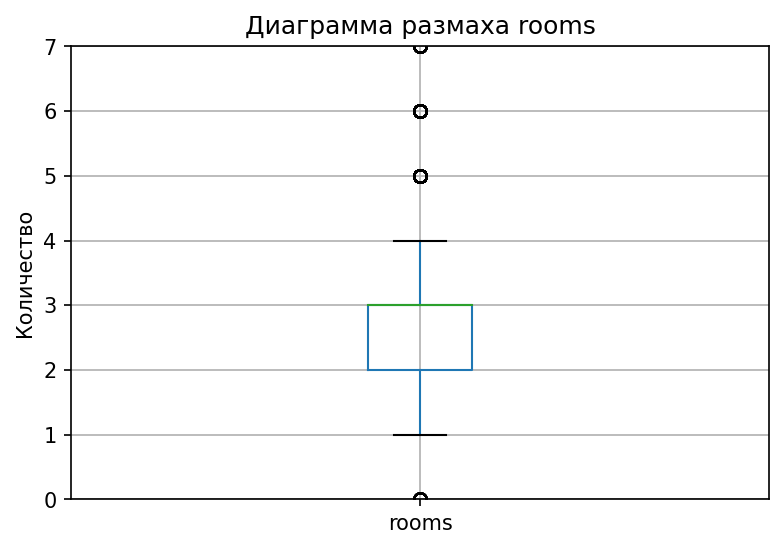

In [133]:
boxplot_parametrs (centre_spb_data, 'rooms', 0, 7, 'Количество')

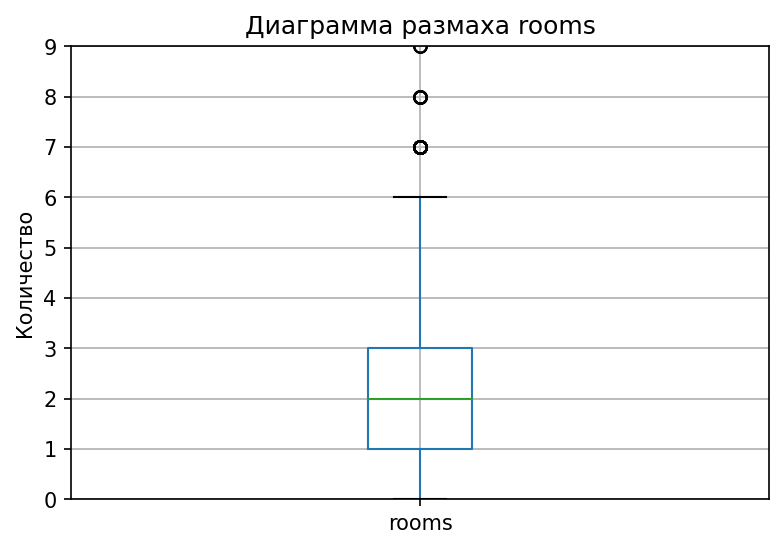

In [134]:
boxplot_parametrs (spb_data, 'rooms', 0, 9, 'Количество')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с одной или двумя комнатами (более 4000 для каждого);
- диаграмма размаха для значений количества комнат показала, что данные имеют выбросы достигающие значения от 7;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от 1 до 3 комнат.

### Центр Санкт-Петербурга
   
- наиболее часто в данных встречаются объявления с двумя или тремя комнатами (более 750 для каждого);
- диаграмма размаха для значений количества комнат показала, что данные имеют выбросы достигающие значения от 5;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от 2 до 3 комнат;

### Различия
- характерные значения количества комнат в квартире для центра Санкт-Петербурга выше характерных значений в целом по городу;

__Высота потолков__

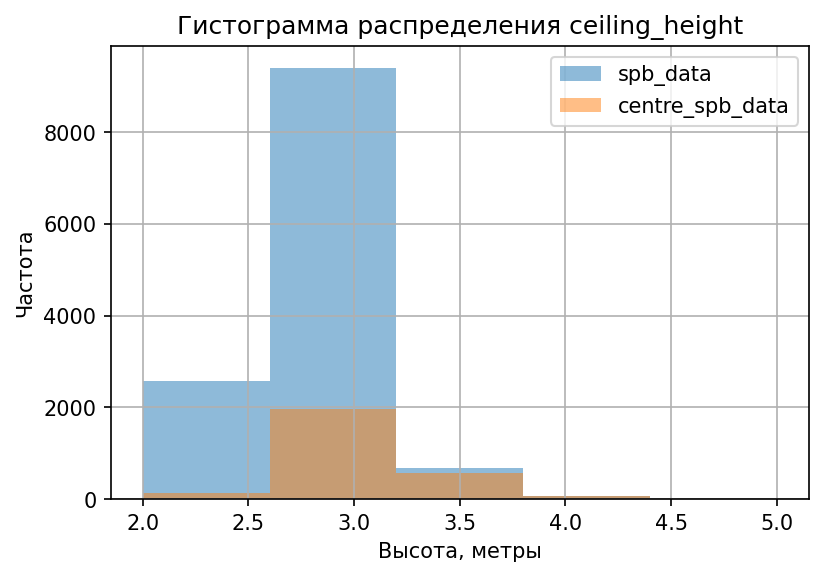

In [135]:
plot_parametrs_two_df (spb_data, centre_spb_data, 'ceiling_height', 2, 5, 5, 'Высота, метры')

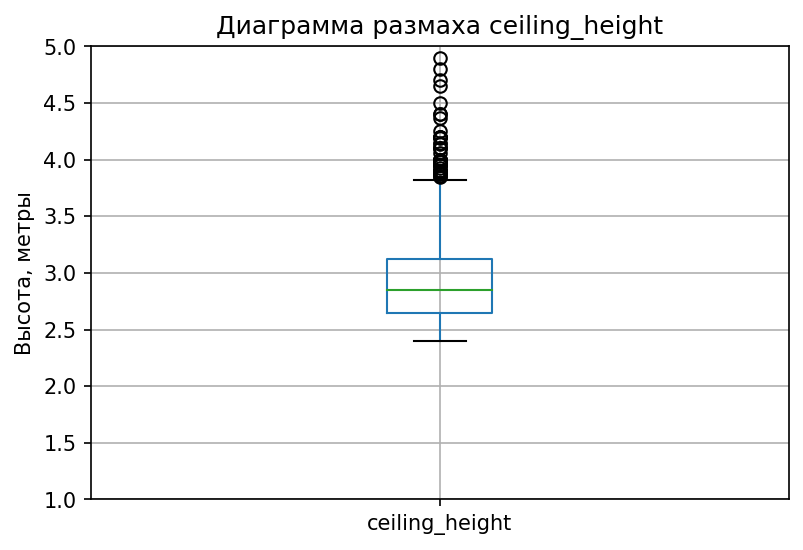

In [136]:
boxplot_parametrs (centre_spb_data, 'ceiling_height', 1, 5, 'Высота, метры')

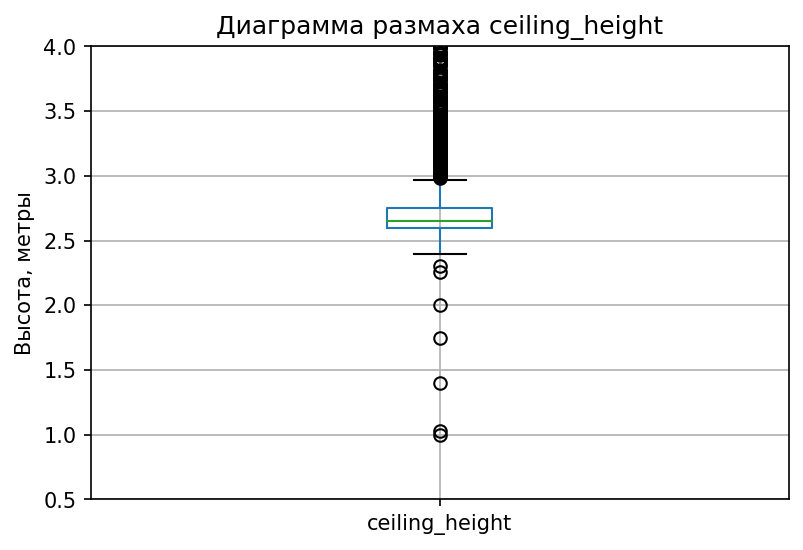

In [137]:
boxplot_parametrs (spb_data, 'ceiling_height', 0.5, 4, 'Высота, метры')

__Выводы:__

### Санкт-Петербург
   
- наиболее часто в данных встречаются объявления с высотой потолка 2,5 метра (более 8500);
- диаграмма размаха для значений высоты потолка показала, что данные имеют выбросы достигающие значения от 3 метров и значения до 2,4 метра;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от 2,6 до 2,8 метров.

### Центр Санкт-Петербурга
   
- наиболее часто в данных встречаются объявления с высотой потолка 2,5 метра (более 1000) и 3 метра (менее 1000);
- диаграмма размаха для значений высоты потолка показала, что данные имеют выбросы достигающие значения от 3,7 метров;
- исходя из анализа "ящика с усами" можно сказать, что чаще встречаются значения в диапазоне от 2,7 до 3,1 метров;

### Различия
- характерные значения высоты потолка в квартире для центра Санкт-Петербурга в целом совпадают с характерными значениями по городу.

### Определение факторов, влияющих на цену квартиры

__Зависимость цены от количества комнат__

Посчитаем коэффициент корреляции этих показателей.

In [138]:
len_spb_data = len(spb_data)

def corr_spb (df, col_1, col_2):
    col = [col_1, col_2]
    df_col = df[col]
    if len(df) == len_spb_data:
        print ('Коэффициент корреляции для объявлений из Санкт-Петербурга')
        return df_col.corr()
    else:
        print ('Коэффициент корреляции для объявлений из центра Санкт-Петербурга')
        return df_col.corr()

corr_spb (spb_data, 'last_price', 'rooms')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,rooms
last_price,1.000000,0.356919
rooms,0.356919,1.000000


In [139]:
corr_spb (centre_spb_data, 'last_price', 'rooms')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,rooms
last_price,1.000000,0.342895
rooms,0.342895,1.000000


__Выводы:__

- Коэф. корреляции позволяет сказать, что между показателями цены и количеством комнат наблюдается средняя степень связи;
- Различий между Санкт-Петербургом и его центром не наблюдается.

__Зависимость цены от общей площади квартиры__

In [140]:
corr_spb (spb_data, 'last_price', 'total_area')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,total_area
last_price,1.000000,0.641915
total_area,0.641915,1.000000


In [141]:
corr_spb (centre_spb_data, 'last_price', 'total_area')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,total_area
last_price,1.000000,0.635222
total_area,0.635222,1.000000


__Выводы:__

- Коэф. корреляции позволяет сказать, что между показателями цены и общей площадью наблюдается сильная степень связи;
- Связь показателей для центра Санкт-Петербурга слабее, чем для Санкт-Петербурга в целом, но незначительно.

__Зависимость цены от удаленности от центра__

In [142]:
corr_spb (spb_data, 'last_price', 'center_distance_km')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,center_distance_km
last_price,1.000000,-0.232076
center_distance_km,-0.232076,1.000000


In [143]:
corr_spb (centre_spb_data, 'last_price', 'center_distance_km')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,center_distance_km
last_price,1.00000,-0.04425
center_distance_km,-0.04425,1.00000


__Выводы:__

- Коэф. корреляции позволяет сказать, что между показателями цены и удаленности от центра наблюдается очень слабая отрицательная степень связи;
- Связь показателей для центра Санкт-Петербурга слабее, чем для Санкт-Петербурга в целом.

__Зависимость цены от дня недели публикации объявления__

In [144]:
corr_spb (spb_data, 'last_price', 'first_exposition_day_of_week')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,first_exposition_day_of_week
last_price,1.000000,0.008897
first_exposition_day_of_week,0.008897,1.000000


In [145]:
corr_spb (centre_spb_data, 'last_price', 'first_exposition_day_of_week')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,first_exposition_day_of_week
last_price,1.00000,0.02158
first_exposition_day_of_week,0.02158,1.00000


__Выводы:__

- Коэф. корреляции позволяет сказать, что между показателями цены и днем недели публикации объявления наблюдается очень слабая степень связи.

__Зависимость цены от месяца недели публикации объявления__

In [146]:
corr_spb (spb_data, 'last_price', 'first_exposition_month')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,first_exposition_month
last_price,1.000000,0.002722
first_exposition_month,0.002722,1.000000


In [147]:
corr_spb (centre_spb_data, 'last_price', 'first_exposition_month')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,first_exposition_month
last_price,1.000000,-0.001053
first_exposition_month,-0.001053,1.000000


__Выводы:__

- Коэф. корреляции показателей для Санкт-Петербурга позволяет сказать, что между показателями цены и месяцем публикации объявления наблюдается очень слабая степень связи;
- Коэф. корреляции показателей для центра Санкт-Петербурга указывает, что между показателями цены и месяцем публикации объявления наблюдается очень слабая отрицательная степень связи.

__Зависимость цены от года публикации объявления__

In [148]:
corr_spb (spb_data, 'last_price', 'first_exposition_year')

Коэффициент корреляции для объявлений из Санкт-Петербурга


,last_price,first_exposition_year
last_price,1.000000,-0.046389
first_exposition_year,-0.046389,1.000000


In [149]:
corr_spb (centre_spb_data, 'last_price', 'first_exposition_year')

Коэффициент корреляции для объявлений из центра Санкт-Петербурга


,last_price,first_exposition_year
last_price,1.000000,-0.063111
first_exposition_year,-0.063111,1.000000


__Выводы:__

- Коэф. корреляции показателей позволяет сказать, что между показателями цены и годом публикации объявления наблюдается очень слабая отрицательная степень связи.

__Зависимость цены от этажа квартиры__

Для выявления зависимости цены от этажа квартиры построим столбчатую диаграмму для всех возможных типов этажей.

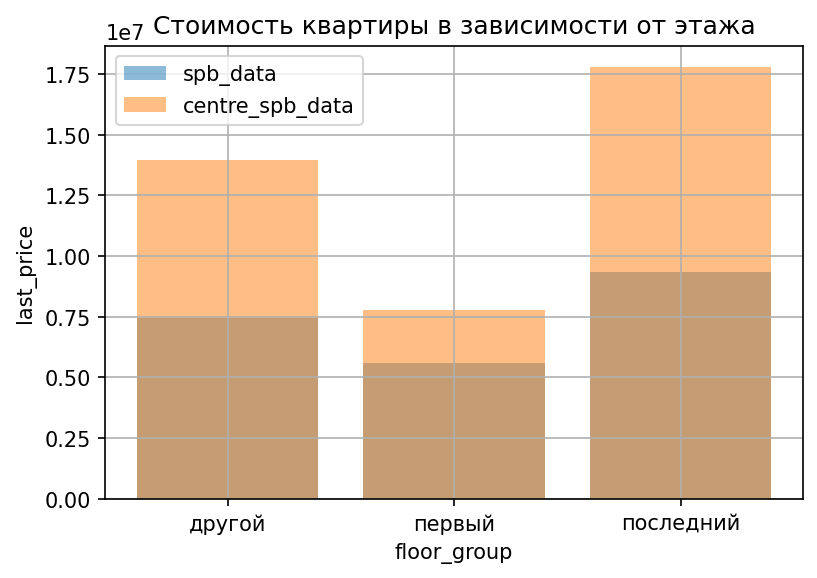

In [150]:
tmp1 = spb_data.groupby('floor_group')['last_price'].mean()
tmp2 = centre_spb_data.groupby('floor_group')['last_price'].mean()
plt.bar(tmp1.index, tmp1.values, alpha=0.5, label='spb_data')
plt.bar(tmp2.index, tmp2.values, alpha=0.5, label='centre_spb_data')
plt.legend()
plt.grid(True)
plt.ylabel('last_price')
plt.xlabel('floor_group')
plt.title ('Стоимость квартиры в зависимости от этажа')
plt.show()

__Выводы:__

- диаграмма позволяет установить, что есть прямая связь между ценой квартиры и этажом, то есть, чем выше этаж, тем выше стоимость квартиры;
- цены в центре Санкт-Петербурге выше общегородских, но связь также прямая.

### Общий вывод по разделу:
- на формирование цены на недвижимость влияют общая площадь и этаж, на котором расположен объект;
- на формирование цены на недвижимость не влияют время публикации, число комнат, удаленность от центра;
- различия между центром Санкт-Петербурга и города в целом заключается в характерных параметрах (за исключением высоты потолков) квартир; 
- значения характерных параметров для недвижимости в центре Санкт-Петербурга выше, чем для города в целом, что связано с тем, что центр в основной масее не имеет типовую застройку в отличие от нецентральных районов.

## Часть 3. Результаты исследования
<a id='section_3_1'></a>

1) В ходе выполнения работы были удалены аномальные значения по количеству дней сколько было активно объявление. В диаграмме размаха аномальные значения начинаются с 500 дней, гистограмма указывает, что значения от 600 дней уже редки. Для того, чтобы не потерять важные значения, мы отбросили данные, где количестве дней размещения объявления о продаже квартиры больше 600;

2) Ссылаясь на гистограмму, диаграмму размаха и медианное значение было определено, что в среднем продажа занимает 90-100 дней;

3) На формирование цены на недвижимость наибольшее влияние оказывают показатели общей площади и этажа квартиры;

4) На формирование цены на недвижимость не влияют время публикации, число комнат, удаленность от центра;

5) Самая высокая цена жилья наблюдается в Санкт-Петербурге, Пушкине и Кудрово;

6) Самая низкая стоимость жилья наблюдается в Выборге, Гатчине и Всеволожске, что можно объяснить тем, данные населенные пункты относятся к Ленинградской области и расположены на значительном расстоянии в отличие от остальных населенных пунктов (кроме Мурино);

7) По результатам анализа графика изменений средней цены за кв. метр жилья от расстояния до центра в километрах в Санкт-Петербурге был определен радиус центральной зоны, равный 7 километрам;

8) Значения характерных параметров для недвижимости в центре Санкт-Петербурга выше, чем для города в целом, что связано с тем, что центр в основной масее не имеет типовую застройку в отличие от нецентральных районов.